# Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn import datasets

import scikitplot as skplt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def train_basic_model(df, target, model, metric, test_size = 0.3):
    """
    Automate the training of a model on a train/test standard split of the dataframe
    """
    
    X = df.drop(target, axis=1)
    y = df[target]
    
    X = pd.get_dummies(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    print(confusion_matrix(y_test, preds))
    
    print(metric(y_test, preds))
    
    return(metric(y_test, preds))

In [5]:
df = pd.read_csv("Data/data.csv")
column_names = list(df.columns)

df.drop(["num", "Total"], axis=1, inplace=True)

X_num = df.iloc[:,3:10]
y_cat = df["Legendary"]

In [6]:
target = "Legendary"
X = df.drop([target, "Name", "Type 2"], axis=1).copy()
y = df[target].copy()
X_num = X.select_dtypes(np.number)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

# Baseline model

# Preparation

## Missing values

In [22]:
print(df.isna().sum())

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [23]:
# df.dropna(axis=1, inplace=True)
df.fillna("Missing")
df.describe()

HP      Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    69.258750   79.001250   73.842500   72.820000   71.902500   68.277500   
std     25.534669   32.457366   31.183501   32.722294   27.828916   29.060474   
min      1.000000    5.000000    5.000000   10.000000   20.000000    5.000000   
25%     50.000000   55.000000   50.000000   49.750000   50.000000   45.000000   
50%     65.000000   75.000000   70.000000   65.000000   70.000000   65.000000   
75%     80.000000  100.000000   90.000000   95.000000   90.000000   90.000000   
max    255.000000  190.000000  230.000000  194.000000  230.000000  180.000000   

       Generation  
count   800.00000  
mean      3.32375  
std       1.66129  
min       1.00000  
25%       2.00000  
50%       3.00000  
75%       5.00000  
max       6.00000

In [27]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = df.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
df_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
df_imp_mean = pd.DataFrame(df_imp_mean, columns=numeric_cols.columns)

# Check for missing values
print(df_imp_mean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
HP            800 non-null float64
Attack        800 non-null float64
Defense       800 non-null float64
Sp. Atk       800 non-null float64
Sp. Def       800 non-null float64
Speed         800 non-null float64
Generation    800 non-null float64
dtypes: float64(7)
memory usage: 43.8 KB
None


## Outlier detection

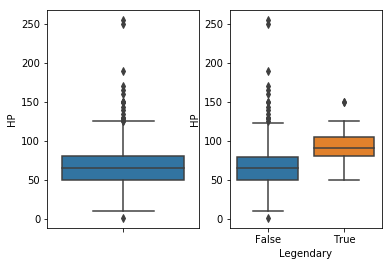

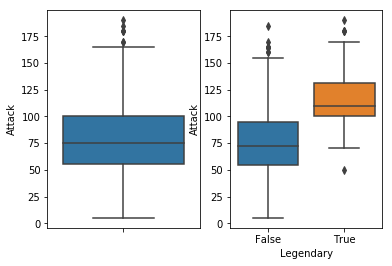

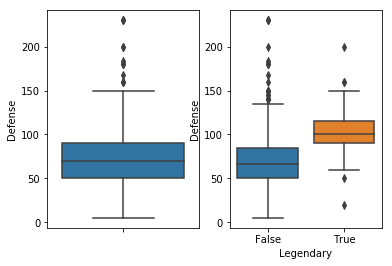

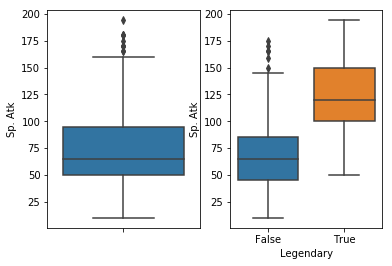

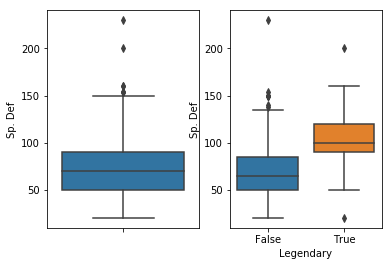

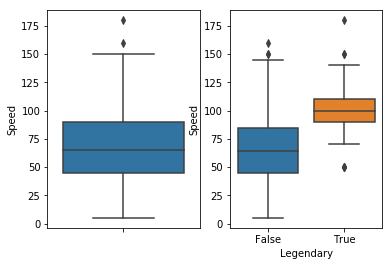

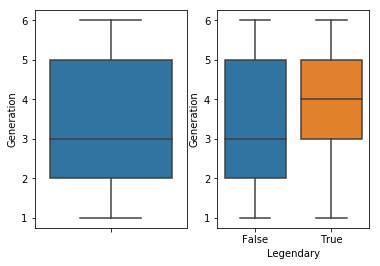

In [45]:
for col in df.select_dtypes(np.number).columns:
    fig, ax =plt.subplots(1,2)
    sns.boxplot(y=df[col], ax=ax[0])
    sns.boxplot(x='Legendary', y=col, data=df, ax=ax[1])
    plt.show()

In [50]:
import scipy.stats as stats

idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

df[idx].shape

(768, 11)

In [59]:
import scipy.stats.mstats as mstats

pd.DataFrame(mstats.winsorize(df[target], limits=[0.05,0.05]), columns=[target])

Attack
0        49
1        62
2        82
3       100
4        52
5        64
6        84
7       130
8       104
9        48
10       63
11       83
12      103
13       30
14       30
15       45
16       35
17       30
18       90
19      136
20       45
21       60
22       80
23       80
24       56
25       81
26       60
27       90
28       60
29       85
..      ...
770      65
771      92
772      58
773      50
774      50
775      75
776     100
777      80
778      70
779     110
780      66
781      66
782      66
783      66
784      90
785      85
786      95
787     100
788      69
789     117
790      30
791      70
792     131
793     131
794     100
795     100
796     136
797     110
798     136
799     110

[800 rows x 1 columns]

In [61]:
from sklearn.preprocessing import StandardScaler

# Subset features
numeric_cols = df.select_dtypes(include=[np.number])
categoric_cols = df.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())

         HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  Generation  \
0 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189 -0.801503   -1.399637   
1 -0.362822 -0.524130 -0.347917  0.219560  0.291156 -0.285015   -1.399637   
2  0.420917  0.092448  0.293849  0.831146  1.010283  0.403635   -1.399637   
3  0.420917  0.647369  1.577381  1.503891  1.729409  0.403635   -1.399637   
4 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533 -0.112853   -1.399637   

                    Name Type 1  Type 2  
0              Bulbasaur  Grass  Poison  
1                Ivysaur  Grass  Poison  
2               Venusaur  Grass  Poison  
3  VenusaurMega Venusaur  Grass  Poison  
4             Charmander   Fire     NaN  


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Box cox

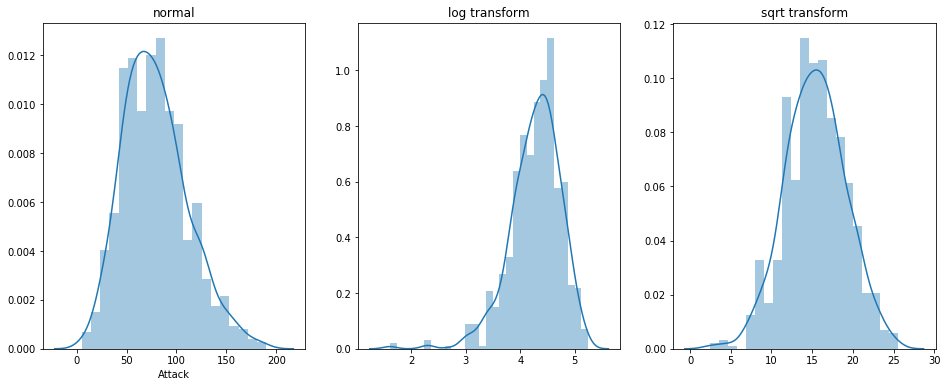

In [44]:
from scipy.stats import boxcox

y_log = boxcox(y, lmbda = 0)
y_sqrt = boxcox(y, lmbda = 0.5)

fig, axs = plt.subplots(1,3, figsize=(16,6))
sns.distplot(y, ax=axs[0])
axs[0].set_title("normal")
sns.distplot(y_log, ax=axs[1])
axs[1].set_title("log transform")
sns.distplot(y_sqrt, ax=axs[2])
axs[2].set_title("sqrt transform")
plt.show()

## Normalization

In [19]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes("number").columns.tolist()
numerical_cols.remove("Generation")

scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(df[numerical_cols])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, 
                                columns=numerical_cols)

scaled_numerical.head()

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
0 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189 -0.801503
1 -0.362822 -0.524130 -0.347917  0.219560  0.291156 -0.285015
2  0.420917  0.092448  0.293849  0.831146  1.010283  0.403635
3  0.420917  0.647369  1.577381  1.503891  1.729409  0.403635
4 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533 -0.112853

## categorical encoding

In [10]:
categorica_cols = df.nunique()[df.nunique() < 30].keys().tolist()

pd.get_dummies(data = df, 
               columns = categorica_cols, 
               drop_first=True).head()

Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0              Bulbasaur  45      49       49       65       65     45   
1                Ivysaur  60      62       63       80       80     60   
2               Venusaur  80      82       83      100      100     80   
3  VenusaurMega Venusaur  80     100      123      122      120     80   
4             Charmander  39      52       43       60       50     65   

   Type 1_Dark  Type 1_Dragon  Type 1_Electric       ...        \
0            0              0                0       ...         
1            0              0                0       ...         
2            0              0                0       ...         
3            0              0                0       ...         
4            0              0                0       ...         

   Type 2_Psychic  Type 2_Rock  Type 2_Steel  Type 2_Water  Generation_2  \
0               0            0             0             0             0   
1               0            0             0             0             0   
2               0            0             0             0             0   
3               0            0             0             0             0   
4               0            0             0             0             0   

   Generation_3  Generation_4  Generation_5  Generation_6  Legendary_True  
0             0             0             0             0               0  
1             0             0             0             0               0  
2             0             0             0             0               0  
3             0             0             0             0               0  
4             0             0             0             0               0  

[5 rows x 47 columns]

## Feature selection

Filter selection methods based on statistics

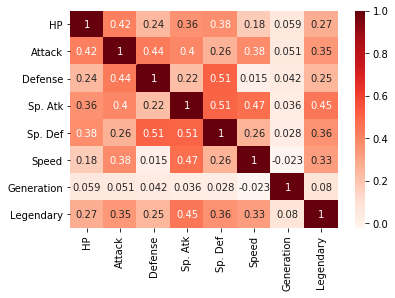

HP           0.422386
Defense      0.438687
Sp. Atk      0.396362
Speed        0.381240
Legendary    0.345408
Name: Attack, dtype: float64


In [14]:
cor = df.corr()

plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor[target])

#Selecting highly correlated features
best_features = cor_target[(cor_target > 0.3) & (cor_target != 1)]
print(best_features)

In [20]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X_num, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X_num.columns)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]
Index(['HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation'], dtype='object')


In [21]:
# Import modules
from sklearn.linear_model import LarsCV

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X_num, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X_num, y))
print(lars_mod.alpha_)

0.439694672546598
1.8814977097924543


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invali

<Figure size 432x288 with 0 Axes>

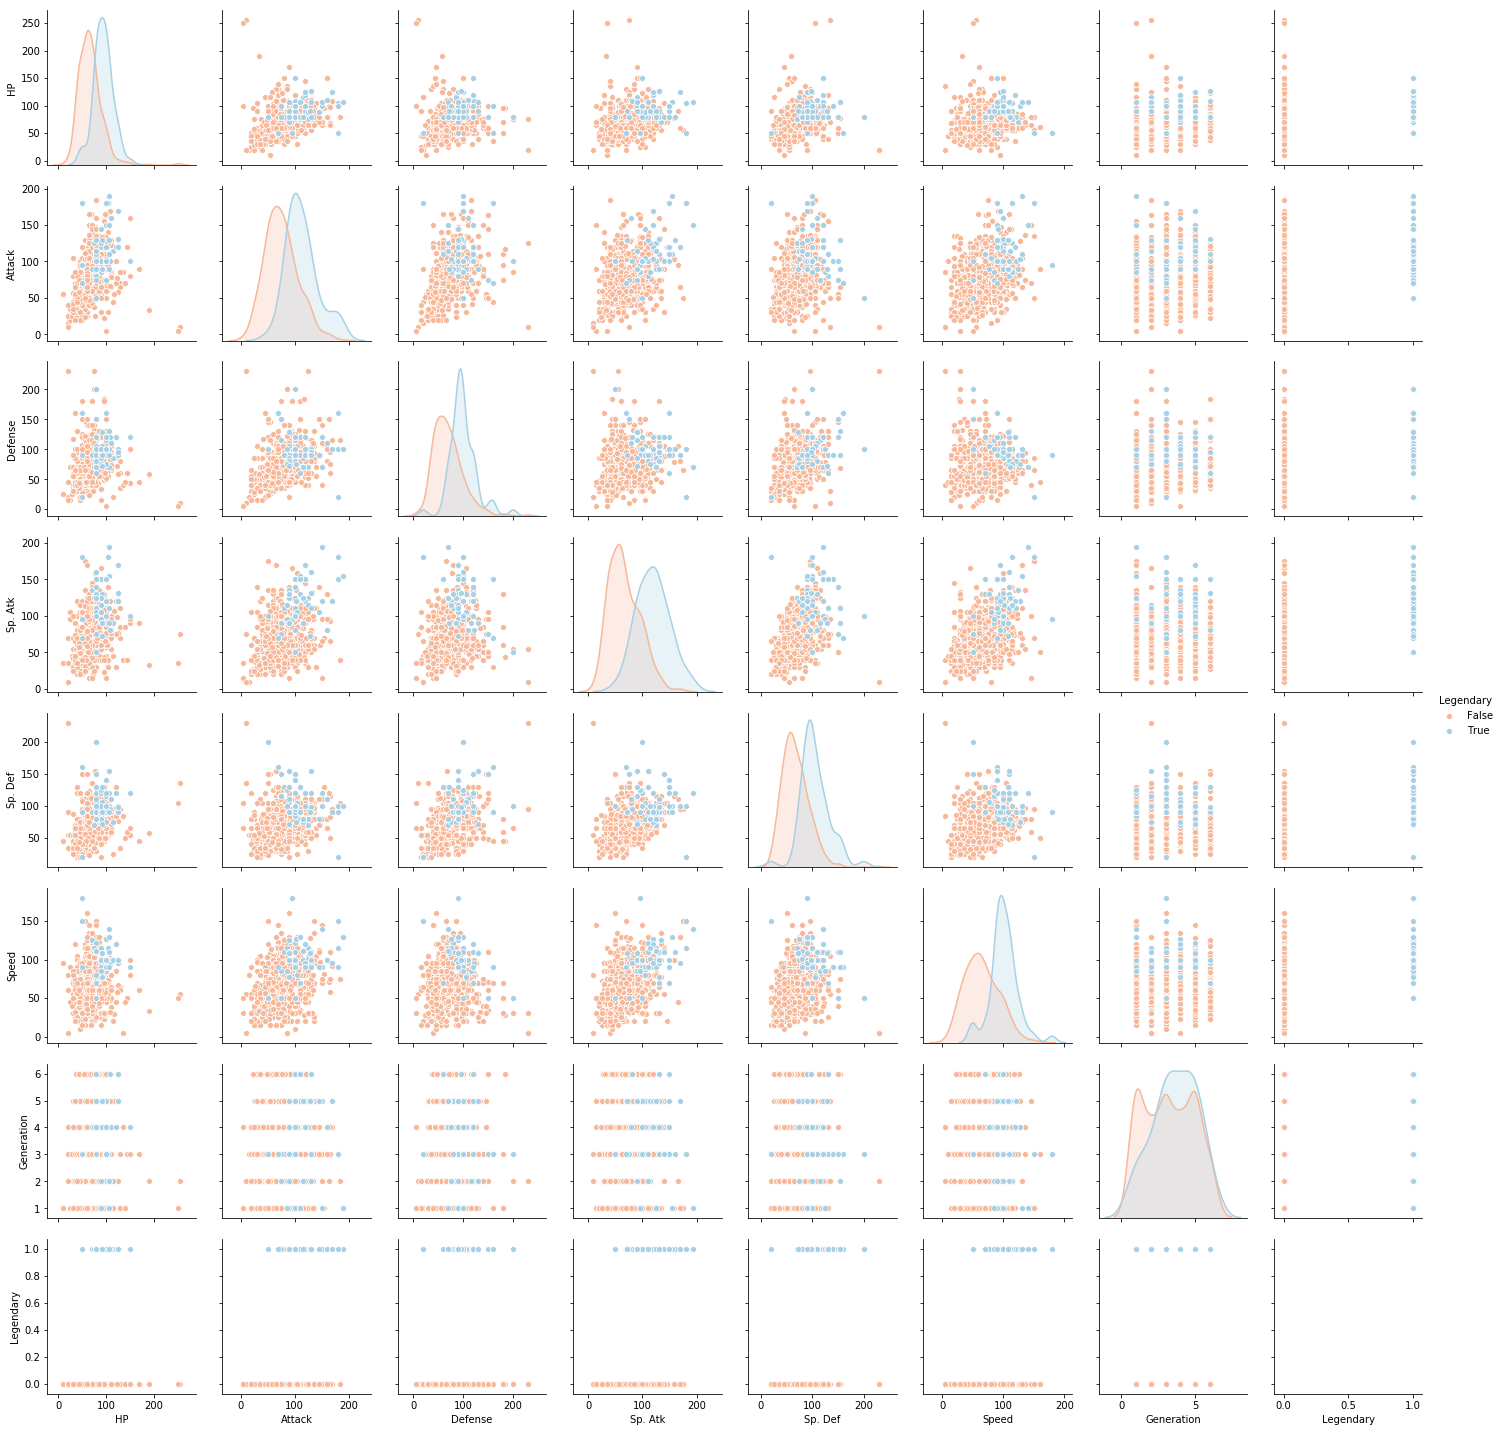

<Figure size 432x288 with 0 Axes>

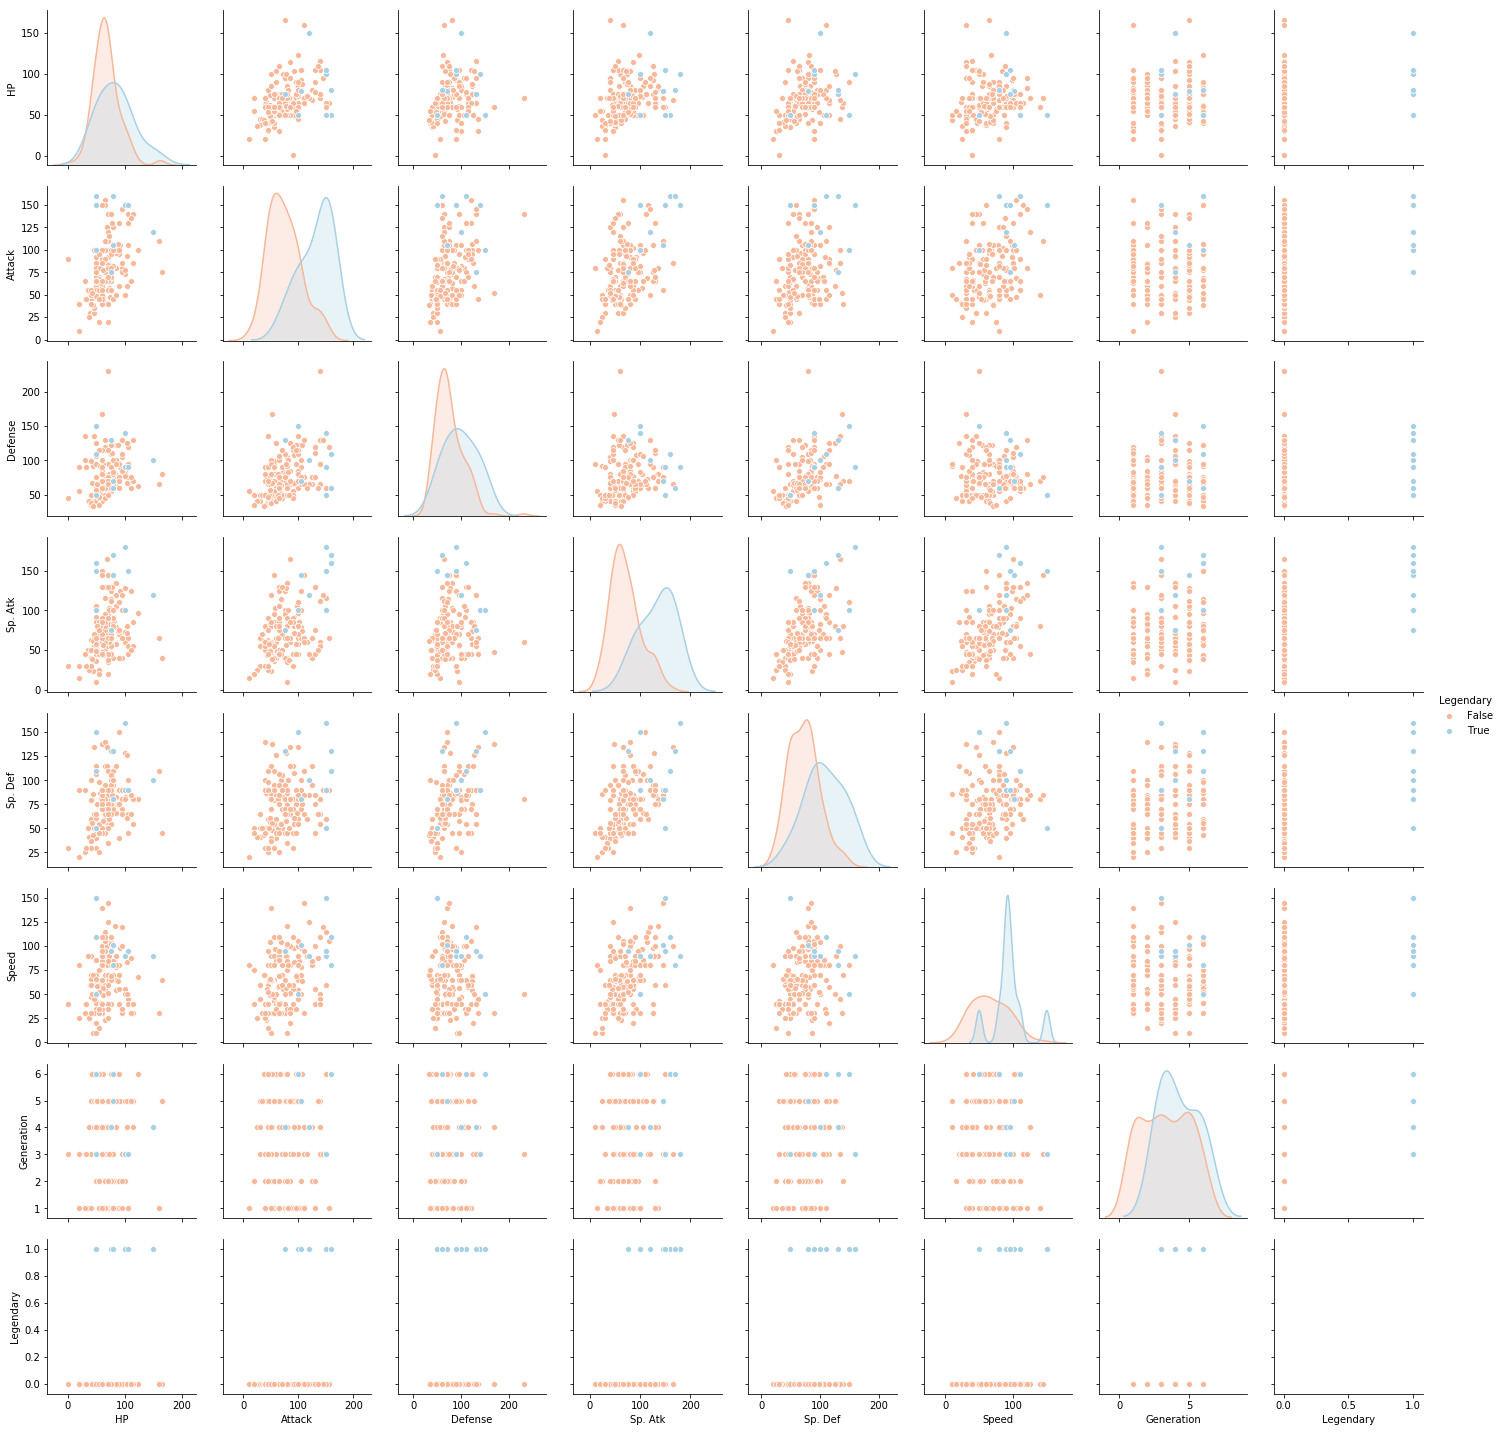

In [33]:
trainingSet, testSet = train_test_split(df, test_size=0.2, random_state=42)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Legendary', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Legendary', palette='RdBu')
plt.show()

Using feature importance for tree based models

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


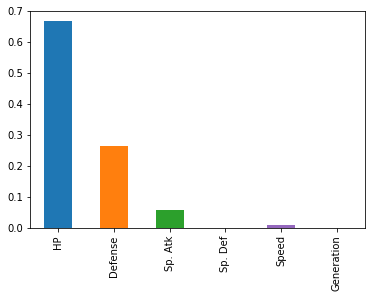

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X_num, y)

# Print
print(df.columns)
pd.Series(rf_mod.feature_importances_, index=X_num.columns).plot(kind='bar')

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


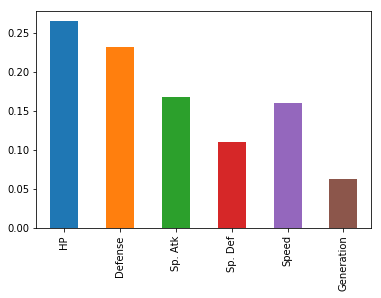

In [68]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X_num, y)

# Print
print(df.columns)
pd.Series(xt_mod.feature_importances_, index=X_num.columns).plot(kind='bar')

## Regularization

### Ridge - L2

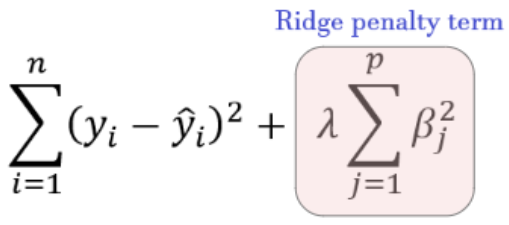

In [86]:
# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

638.726345924634


### Lasso - L1

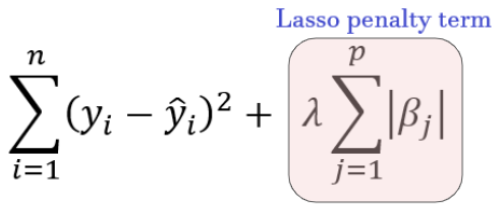

In [88]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True, fit_intercept=False)
lr.fit(X_train, y_train)

print(mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test)))

632.86312989363


In [84]:
# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

639.5035708475057


### ElasticNet 

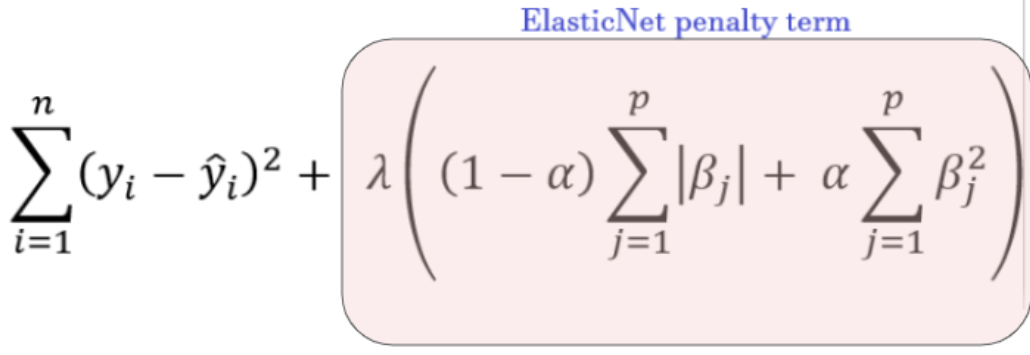

## Feature engineering

In [109]:
df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0              Bulbasaur  Grass  Poison  45      49       49       65   
1                Ivysaur  Grass  Poison  60      62       63       80   
2               Venusaur  Grass  Poison  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [111]:
df2 = df.copy()
df2["max_stats"] = df2.max(axis=1)
df2["min_stats"] = df2.min(axis=1)
df2["offensive"] = df2["Attack"] + df2["Sp. Atk"]
df2["defensive"] = df2["Defense"] + df2["Sp. Def"]

df2.drop(["Sp. Atk", "Sp. Def"], axis=1, inplace=True)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Before feature engineering")
train_basic_model(df, "Legendary", LogisticRegression(), accuracy_score)

print("\nAfter feature engineering")
train_basic_model(df2, "Legendary", LogisticRegression(), accuracy_score)

Before feature engineering
[[221   4]
 [ 10   5]]
0.9416666666666667

After feature engineering


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[225   0]
 [  0  15]]
1.0


1.0

# Feature selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


selector = SelectKBest(chi2, k=5)
selector.fit(X_num, y)
top_features = selector.get_support().nonzero()

X_num.iloc[:,top_features[0]].head()


Attack  Defense  Sp. Atk  Sp. Def  Speed
0      49       49       65       65     45
1      62       63       80       80     60
2      82       83      100      100     80
3     100      123      122      120     80
4      52       43       60       50     65

# Cross validation

## K-fold

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer

rfc = RandomForestClassifier(n_estimators=25, random_state=1111)
acc = make_scorer(accuracy_score)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X_train,
                     y=y_train,
                     cv=10,
                     scoring=acc)

# Print the mean error
print("CV mean accuracy = {:.1%}".format(cv.mean()))
print("CV std accuracy = {:.1%}".format(cv.std()))

rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

print("test accuracy = {:.1%}".format(accuracy_score(y_test, preds)))

CV mean accuracy = 94.3%
CV std accuracy = 2.7%
test accuracy = 95.5%


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_dist = {"n_estimators": [20,50,100],
                "max_depth": [2,4,6],
                "max_features": [2, 4, 6],
                "min_samples_split": [2, 4, 8]}

gb = GradientBoostingClassifier()

grid_dt = GridSearchCV(estimator=gb,
                       param_grid=param_dist,
                       scoring="roc_auc",
                       cv=5,
                       n_jobs=2,
                       verbose = -1)

grid_dt.fit(X_train, y_train)

best_model = grid_dt.best_estimator_

y_pred_proba = best_model.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print(best_model.best_params)

Test set ROC AUC score: 0.963


In [59]:
print(gb.get_params())

{'n_estimators': 100, 'max_depth': 3, 'min_weight_fraction_leaf': 0.0, 'verbose': 0, 'n_iter_no_change': None, 'subsample': 1.0, 'min_impurity_decrease': 0.0, 'max_features': None, 'init': None, 'validation_fraction': 0.1, 'min_impurity_split': None, 'criterion': 'friedman_mse', 'tol': 0.0001, 'min_samples_leaf': 1, 'loss': 'deviance', 'max_leaf_nodes': None, 'min_samples_split': 2, 'warm_start': False, 'presort': 'auto', 'learning_rate': 0.1, 'random_state': None}


## LOOCV (leave one out cross val)

* best when not many data in training set
* best to have idea of error on a new point

In [34]:
rfc = RandomForestClassifier(n_estimators=25, random_state=1111)
acc = make_scorer(accuracy_score)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X_train,
                     y=y_train,
                     cv=400,
                     scoring=acc)

# Print the mean error
print("CV mean accuracy = {:.1%}".format(cv.mean()))
print("CV std accuracy = {:.1%}".format(cv.std()))

rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

print("test accuracy = {:.1%}".format(accuracy_score(y_test, preds)))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 52 members, which is too few. The minimum number of members in any class cannot be less than n_splits=400.
  % (min_groups, self.n_splits)), Warning)


CV mean accuracy = 95.6%
CV std accuracy = 15.5%
test accuracy = 95.5%


## Randomized search

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

param_dist = {"n_estimators": [20,50,100,150],
                "max_depth": [2,4,6,8],
                "max_features": [2, 4, 6],
                "min_samples_split": [2, 4, 8, 16]}

rfr = RandomForestClassifier(random_state=42)

scorer = make_scorer(accuracy_score)

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=30,
        cv=5,
        scoring=scorer)


rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=None,
          param_distributions={'n_estimators': [20, 50, 100, 150], 'max_depth': [2, 4, 6, 8], 'max_features': [2, 4, 6], 'min_samples_split': [2, 4, 8, 16]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=make_scorer(accuracy_score),
          verbose=0)

In [45]:
print(rs.best_score_)
print(rs.best_params_)
print(rs.best_estimator_)

0.945
{'n_estimators': 100, 'max_depth': 8, 'max_features': 2, 'min_samples_split': 8}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [46]:
preds = rs.best_estimator_.predict(X_test)

print(accuracy_score(y_test, preds))

0.95


In [47]:
gs_results = pd.DataFrame(rs.cv_results_)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings

In [50]:
gs_results.groupby("param_n_estimators")["mean_test_score"].mean()

param_n_estimators
20     0.936111
50     0.935833
100    0.933485
150    0.937000
Name: mean_test_score, dtype: float64

# GridSearch

In [8]:
# Import modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
dt = DecisionTreeClassifier()
dtree_cv = GridSearchCV(dt, param_grid, cv=5)

X = df.drop("Legendary", axis=1)
y = df["Legendary"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameter: {'min_samples_split': 2, 'max_depth': 5, 'criterion': 'gini'}
Tuned Decision Tree Accuracy: 0.9214285714285714


In [9]:
# Import modules
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 10, 20], 
              "max_depth": [None, 2, 5, 10]}

# Instantiate classifier and GridSearchCV, fit
dt = DecisionTreeClassifier()
dtree_cv = RandomizedSearchCV(dt, param_grid, cv=5)

X = df.drop("Legendary", axis=1)
y = df["Legendary"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

fit = dtree_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameter: {'min_samples_split': 2, 'max_depth': None, 'criterion': 'gini'}
Tuned Decision Tree Accuracy: 0.925


# Imbalanced datasets

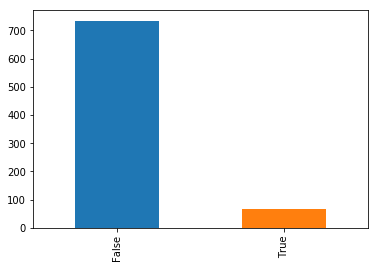

In [13]:
df["Legendary"].value_counts().plot(kind="bar")

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print("Confusion matrix:\n {}".format(confusion_matrix(y_test, preds)))
print("Accuracy: {}".format(accuracy_score(y_test, preds)))
print("Precision: {}".format(precision_score(y_test, preds)))
print("Recall: {}".format(recall_score(y_test, preds)))
print("AUC: {}".format(roc_auc_score(y_test, preds)))

Confusion matrix:
 [[221   4]
 [ 10   5]]
Accuracy: 0.9416666666666667
Precision: 0.5555555555555556
Recall: 0.3333333333333333
AUC: 0.6577777777777777


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(50, 844)
(510, 844)
(1020, 844)
(100, 844)


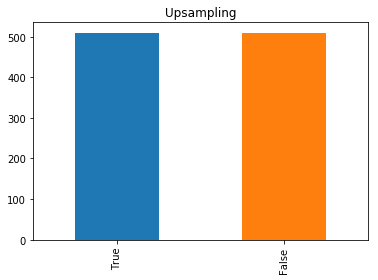

Text(0.5,1,'Downsampling')

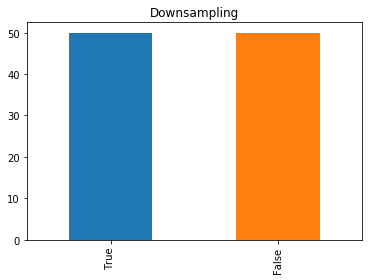

In [29]:
from sklearn.utils import resample

# important to split before upsampling otherwise might be biased because test and train could contain the same data if upsampling

    
df2 = pd.get_dummies(df)

train, test = train_test_split(df2, test_size = 0.3, random_state = 42)

legendary = train[train["Legendary"] == True].copy()
normal = train[train["Legendary"] == False].copy()

print(legendary.shape)
print(normal.shape)

# Upsample minority and combine with majority
df_upsampled = resample(legendary, replace=True, n_samples=len(normal), random_state=42)
upsampled = pd.concat([normal, df_upsampled])

# Downsample majority and combine with minority
df_downsampled = resample(normal, replace = False,  n_samples = len(legendary), random_state = 42)
downsampled = pd.concat([df_downsampled, legendary])

print(upsampled.shape)
print(downsampled.shape)

upsampled["Legendary"].value_counts().plot(kind="bar")
plt.title("Upsampling")
plt.show()
downsampled["Legendary"].value_counts().plot(kind="bar")
plt.title("Downsampling")

In [33]:
# Upsampled feature matrix and target array
X_train_up = upsampled.drop('Legendary', axis=1)
y_train_up = upsampled['Legendary']

X_test = test.drop('Legendary', axis=1)
y_test = test['Legendary']

# Instantiate, fit, predict
loan_lr_up = LogisticRegression()
loan_lr_up.fit(X_train_up, y_train_up)
upsampled_y_pred = loan_lr_up.predict(X_test)

# Print evaluation metrics
print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, upsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, upsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, upsampled_y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, upsampled_y_pred)))

Confusion matrix:
 [[202  23]
 [  2  13]]
Accuracy: 0.8958333333333334
Precision: 0.3611111111111111
Recall: 0.8666666666666667
AUC: 0.8822222222222222


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Multicolinearity

Identify it with heatmap of correlation, VIF

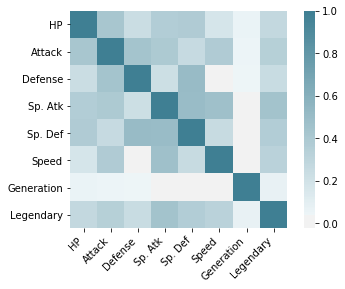

In [41]:
ax = sns.heatmap(df.corr(), center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [43]:
# Import
from sklearn.decomposition import PCA

# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[202  23]
 [  2  13]]
Accuracy: 0.8958333333333334
Precision: 0.3611111111111111
Recall: 0.8666666666666667
AUC: 0.8822222222222222


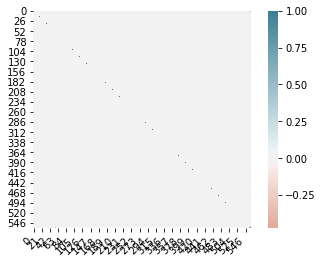

In [48]:
# Import
from sklearn.linear_model import LogisticRegression

# Instantiate, fit, predict
LinRegr = LogisticRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

print("Confusion matrix:\n {}".format(confusion_matrix(y_test, upsampled_y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, upsampled_y_pred)))
print("Precision: {}".format(precision_score(y_test, upsampled_y_pred)))
print("Recall: {}".format(recall_score(y_test, upsampled_y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, upsampled_y_pred)))

# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


# Ensemble techniques

## Bagging

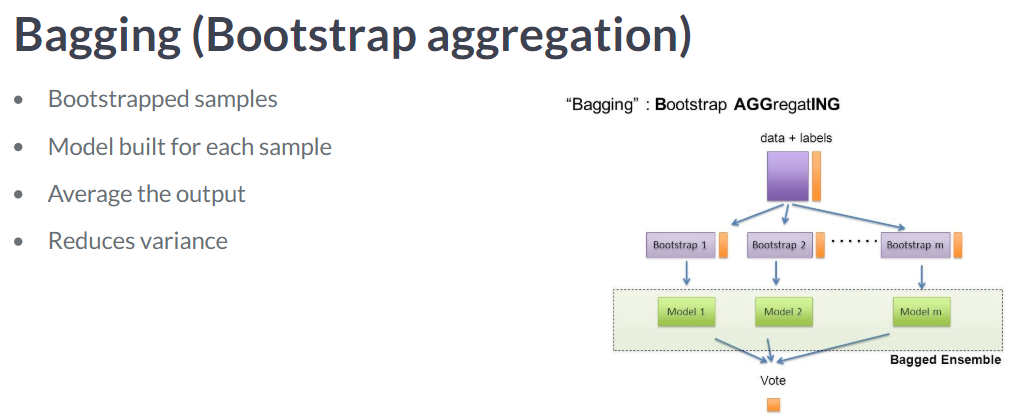

In [55]:
from sklearn.ensemble import BaggingClassifier

train_basic_model(df, "Legendary", BaggingClassifier(n_estimators = 50), roc_auc_score)

[[223   2]
 [  6   9]]
0.7955555555555557


0.7955555555555557

In [65]:
from sklearn.ensemble import RandomForestClassifier

train_basic_model(df, "Legendary", RandomForestClassifier(n_estimators = 20), roc_auc_score)

[[223   2]
 [  8   7]]
0.728888888888889


0.728888888888889

## Boosting

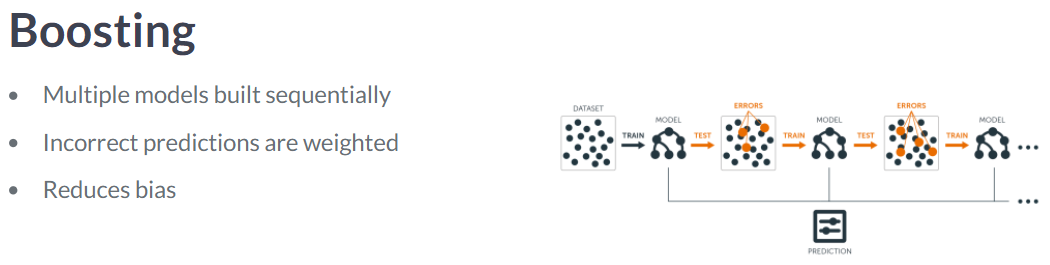

In [51]:
from sklearn.ensemble import AdaBoostClassifier

train_basic_model(df, "Legendary", AdaBoostClassifier(n_estimators = 50), roc_auc_score)

[[219   6]
 [  3  12]]
0.8866666666666668


0.8866666666666668

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

train_basic_model(df, "Legendary", GradientBoostingClassifier(n_estimators = 50), roc_auc_score)
train_basic_model(df, "Legendary", GradientBoostingClassifier(n_estimators = 100), roc_auc_score)
train_basic_model(df, "Legendary", GradientBoostingClassifier(n_estimators = 500), roc_auc_score)

[[222   3]
 [  8   7]]
0.7266666666666667
[[220   5]
 [  7   8]]
0.7555555555555554
[[220   5]
 [  8   7]]
0.7222222222222222


0.7222222222222222

### catboost

In [16]:
from sklearn.model_selection import train_test_split
X_th, X_test, y_th, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train, X_validation, y_train, y_validation = train_test_split(X_th, y_th, test_size = 0.3, random_state = 41)
cat_features = list(range(0, X_train.shape[1]))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'Logloss', 'random_seed': 42, 'max_ctr_complexity': 4, 'custom_loss': ['Accuracy', 'AUC'], 'iterations': 100, 'learning_rate': 0.05}
[('Sp. Atk', 29.59659799961315), ('Sp. Def', 18.808684393478266), ('HP', 14.662071565260035), ('Type 1', 10.814610931073446), ('Defense', 10.42497833675626), ('Attack', 9.360542765276785), ('Speed', 4.926181833134844), ('Generation', 1.4063321754072116)]


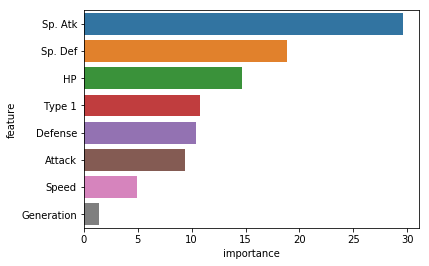

In [46]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.05,
    custom_loss=['Accuracy', "AUC"],
    max_ctr_complexity=4
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

importances = model.get_feature_importance(prettified=True)
print(importances)
feature_imp = pd.DataFrame(importances)
feature_imp.columns = ["feature", "importance"]
sns.barplot(data=feature_imp, y="feature", x="importance")

In [29]:
model = CatBoostClassifier(
    iterations=500,
    random_seed=42,
    learning_rate=0.02,
    custom_loss=['Accuracy'],
    max_ctr_complexity=4,
    od_type='Iter', # overfitting detector
    od_wait=50,
    eval_metric = 'AUC',
#     save_snapshot=True,
#     snapshot_file='snapshot.bkp',
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [25]:
from catboost import Pool

pool_test = Pool(X_test, label=y_test, cat_features=cat_features)
metrics = model.eval_metrics(data=pool_test, metrics=['Logloss','AUC'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [19]:
from catboost import cv


params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 42
params['learning_rate'] = 0.05

cv_data = cv(
    params = params,
    pool = Pool(X_th, label=y_th, cat_features=cat_features),
    fold_count=5,
    inverted=False,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [36]:
fast_model = CatBoostClassifier(
    random_seed=42,
    iterations=500,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    custom_loss=['Accuracy', "AUC", "F1"],
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    border_count=32)

fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    logging_level='Silent',
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## Model stacking

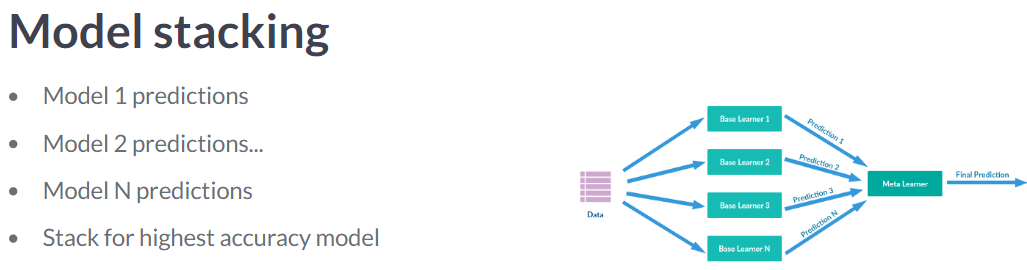

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import VotingClassifier

SEED=1

lr = LogisticRegression(random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

for clf_name, clf in classifiers:    
 
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) 
   
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
vc = VotingClassifier(estimators=classifiers)     
vc.fit(X_train, y_train)   
y_pred = vc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('\nVoting Classifier: {:.3f}'.format(accuracy))

Logistic Regression : 0.950
K Nearest Neighbours : 0.925
Classification Tree : 0.935

Voting Classifier: 0.950


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
X = df.iloc[:,3:-1]
y = df["Legendary"].copy()

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.5)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = GaussianNB()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

val_preds1 = model1.predict(X_val)
val_preds2 = model2.predict(X_val)
val_preds3 = model3.predict(X_val)
val_preds4 = model4.predict(X_val)

test_preds1 = model1.predict(X_test)
test_preds2 = model2.predict(X_test)
test_preds3 = model1.predict(X_test)
test_preds4 = model2.predict(X_test)

val_stacked_pred = np.column_stack((val_preds1, val_preds2, val_preds3, val_preds4))
test_stacked_pred = np.column_stack((test_preds1, test_preds2, test_preds3, test_preds4))

meta_model = LogisticRegression()

# generally it's a small learner
meta_model.fit(val_stacked_pred, y_val)

final_test_preds = meta_model.predict(test_stacked_pred)

print("accuracy with stacking = {:.2%}".format(accuracy_score(y_test, final_test_preds)))

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("accuracy without stacking = {:.2%}".format(accuracy_score(y_test, preds)))

accuracy with stacking = 93.50%
accuracy without stacking = 92.50%


# Unsupervised learning

## preprocessing

In [74]:
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


## PCA

[0.4607257  0.18742579 0.13577187 0.09798573 0.07374491]


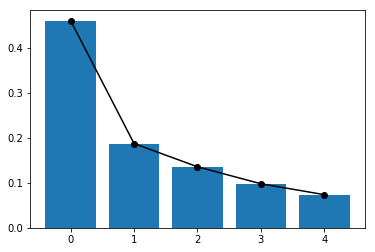

In [33]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=5)

# Fit and transform
X_pca = pca.fit_transform(X_num)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)
plt.bar(range(5),pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, "k-o")

## SVD

[0.4522657  0.18768967 0.13580086 0.09817961 0.08054501]


<BarContainer object of 5 artists>

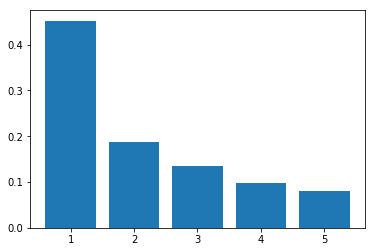

In [27]:
from sklearn.decomposition import TruncatedSVD

# SVD
svd = TruncatedSVD(n_components=5)

# Fit and transform
X_svd = svd.fit_transform(X_num)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)
plt.bar([1,2,3,4,5],svd.explained_variance_ratio_)

## t-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 14.343872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.268711
[t-SNE] KL divergence after 1000 iterations: 0.993052


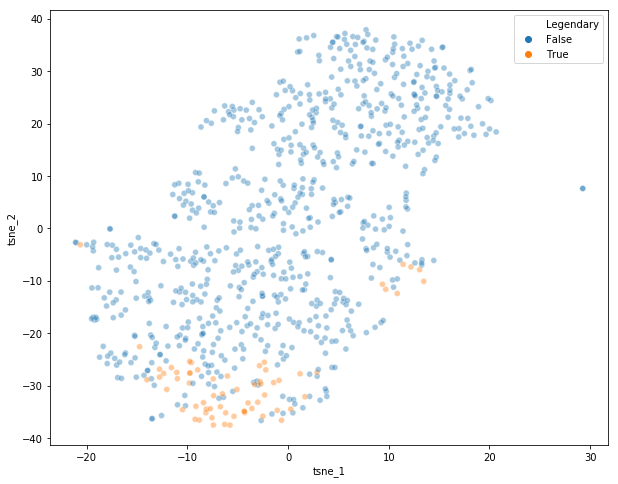

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2,
           verbose = 1,
           perplexity = 40)

tsne_results = tsne.fit_transform(X_num)

df2 = df.copy()
df2["tsne_1"] = tsne_results[:,0]
df2["tsne_2"] = tsne_results[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne_1", y = "tsne_2",
               hue = "Legendary",
               data=df2,
               legend = "full",
               alpha = 0.4)


## Clustering

### K-Means

Inertia = SS between points and nearest centroid

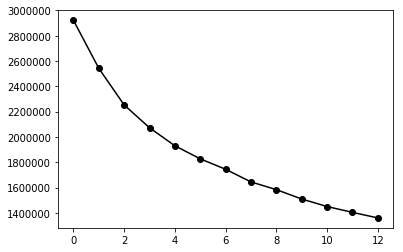

In [50]:
from sklearn.cluster import KMeans

inertias = []
for n_clust in range(2,15):
    
    kmeans = KMeans(n_clusters=n_clust, 
                    random_state=42)

    # Fit
    fit = kmeans.fit(X_num)

    # Print inertia
#     print("Sum of squared distances for {} clusters is {:.0f}".format(n_clust, kmeans.inertia_))
    inertias.append(kmeans.inertia_)
    
plt.plot(inertias, 'k-o')

silhouette = différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec le points des autres groupes voisins (séparation).

For n_clusters = 2, silhouette score is 0.2880546478002823)
For n_clusters = 3, silhouette score is 0.26209528614613065)
For n_clusters = 4, silhouette score is 0.2253085892370673)
For n_clusters = 5, silhouette score is 0.22317503295393237)
For n_clusters = 6, silhouette score is 0.2267006464282592)
For n_clusters = 7, silhouette score is 0.21507610506290267)
For n_clusters = 8, silhouette score is 0.1670325220988808)


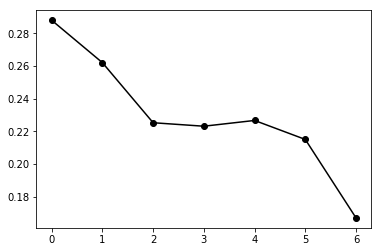

In [51]:
from sklearn.metrics import silhouette_score

scores = []
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, preds, metric='euclidean'))
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, scores[-1]))
    
plt.plot(scores, 'k-o')

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


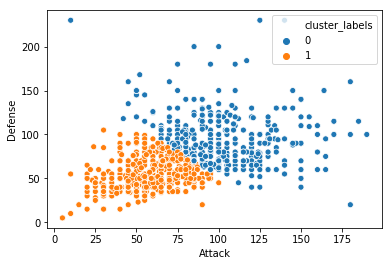

In [108]:
from scipy.cluster.vq import kmeans, vq

X_num.Attack = X_num.Attack.astype(float)
X_num.Defense = X_num.Defense.astype(float)
cluster_centers, distortion = kmeans(X_num[["Attack", "Defense"]], 2)

# Assign cluster labels
X_num['cluster_labels'], distortion_list = vq(X_num[["Attack", "Defense"]], cluster_centers)

# Plot clusters
sns.scatterplot(x='Attack', y='Defense', 
                hue='cluster_labels', data = X_num)
plt.show()

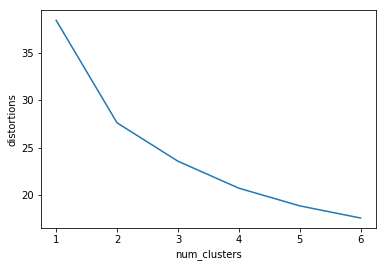

In [109]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(X_num[["Attack", "Defense"]], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Anomaly detection

In [52]:
data = pd.get_dummies(df.drop(["Name", "Total"], axis=1))


0.08125


array([[ 11,  54],
       [ 54, 681]])

0.5478806907378335


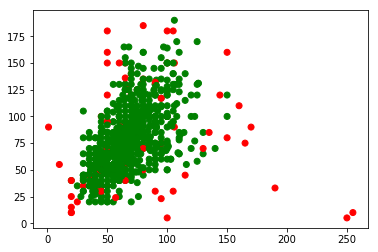

In [129]:
from sklearn.neighbors import LocalOutlierFactor as lof

ground_truth = np.array([-1 if x==True else 1 for x in y])
print(np.mean(ground_truth == -1))

model = lof(contamination = np.mean(ground_truth == -1),
           metric = "chebyshev")
preds = model.fit_predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)


display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

## Novelty detection

In [125]:
X = pd.DataFrame([1.0]*30)

detector = lof(novelty=True)

detector.fit(X)

test = pd.DataFrame([1 if x > 0.2 else 10 for x in np.random.rand(10)])
preds = detector.predict(test)

pd.concat([test, pd.DataFrame(preds)],1)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


0  0
0   1  1
1   1  1
2   1  1
3   1  1
4   1  1
5   1  1
6   1  1
7  10 -1
8   1  1
9   1  1

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


array([[ 19,  67],
       [ 46, 668]])

0.5782522311250081


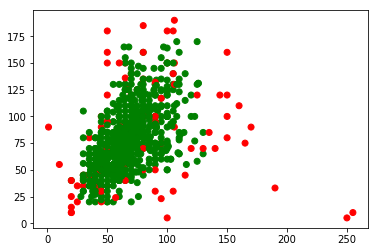

In [110]:
model = lof(novelty = True) # when there was no anomaly in the train data
model.fit(data[data[target] == False])
preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)


display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[ 65, 366],
       [  0, 369]])

0.5754060324825986


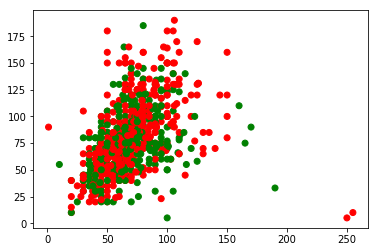

In [114]:
from sklearn.svm import OneClassSVM

model = OneClassSVM() # also works for novelty detection

model.fit(data[data[target] == False])

preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)
display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:214: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([[ 27,  74],
       [ 38, 661]])

0.6064816782107396


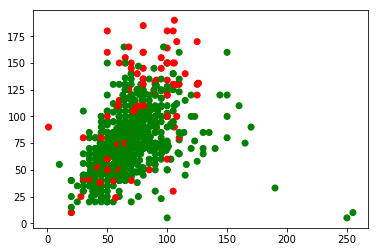

In [116]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(data[data[target] == False])

scores = model.score_samples(data)

preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)
display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

## sklearn-unsupervised

In [137]:
from sklearn.neighbors import DistanceMetric as dm

dist = dm.get_metric("euclidean")

A= [
    [0,1],
    [2,3],
    [0,6]
]
dist.pairwise(A)

array([[0.        , 2.82842712, 5.        ],
       [2.82842712, 0.        , 3.60555128],
       [5.        , 3.60555128, 0.        ]])

In [138]:
from scipy.spatial.distance import pdist

pdist(A, "cityblock")

array([4., 5., 5.])

In [142]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x="num_clusters", y="distortions", data = elbow_plot)
plt.xticks(num_clusters)
plt.show()from scipy.spatial.distance import squareform

squareform(pdist(X, "euclidean"))

array([[  0.        ,  35.56683849,  84.52810184, ..., 131.03053079,
        173.69225659, 124.45481108],
       [ 35.56683849,   0.        ,  48.98979486, ..., 101.19288513,
        145.05171492,  93.16651759],
       [ 84.52810184,  48.98979486,   0.        , ...,  69.57010852,
        111.53474795,  57.27128425],
       ...,
       [131.03053079, 101.19288513,  69.57010852, ...,   0.        ,
         54.77225575,  74.8465096 ],
       [173.69225659, 145.05171492, 111.53474795, ...,  54.77225575,
          0.        ,  96.96391081],
       [124.45481108,  93.16651759,  57.27128425, ...,  74.8465096 ,
         96.96391081,   0.        ]])

### Non negative matrix factorization NMF

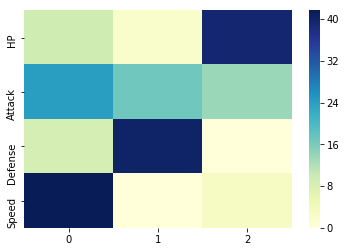

In [40]:
from sklearn.decomposition import NMF

subset = df[["HP", "Attack", "Defense", "Speed"]].copy()

nmf = NMF(3)

nmf.fit(subset)
 
components = pd.DataFrame(data=nmf.components_, columns=subset.columns)

sns.heatmap(components.T, cmap = "YlGnBu")

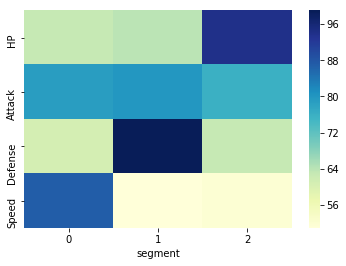

In [42]:
# Create the W matrix
W = pd.DataFrame(data=nmf.transform(subset), columns=components.index)
W.index = subset.index

# Assign the column name where the corresponding value is the largest
subset_nmf3 = subset.assign(segment = W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf3_averages = subset_nmf3.groupby('segment').mean().round(0)

# Plot the average values as heatmap
sns.heatmap(nmf3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

### Hierarchical clustering

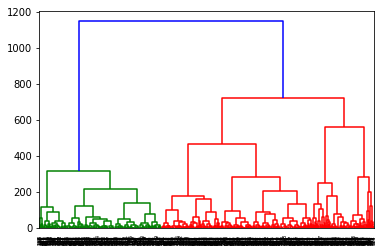

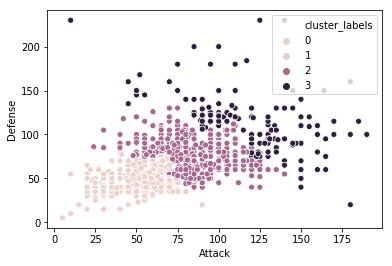

In [92]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

df = X_num[["Attack", "Defense"]].copy()

distance_matrix = linkage(df, 
            method = 'ward', # also single, complete, average, centroid, median, ward
            metric = "euclidean")

dn = dendrogram(distance_matrix)
plt.show()

df['cluster_labels'] = fcluster(distance_matrix,
                                3,
                                criterion='maxclust')


sns.scatterplot(x="Attack", y="Defense", hue="cluster_labels", data=df)
plt.show()

In [ ]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

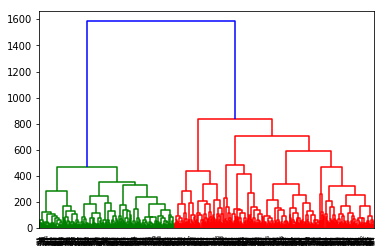

HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  cluster_label
0     45      49       49       65       65     45           1              1
1     60      62       63       80       80     60           1              1
2     80      82       83      100      100     80           1              3
3     80     100      123      122      120     80           1              2
4     39      52       43       60       50     65           1              1
5     58      64       58       80       65     80           1              3
6     78      84       78      109       85    100           1              3
7     78     130      111      130       85    100           1              2
8     78     104       78      159      115    100           1              2
9     44      48       65       50       64     43           1              1
10    59      63       80       65       80     58           1              3
11    79      83      100       85      105     78           1              3
12    79     103      120      135      115     78           1              2
13    45      30       35       20       20     45           1              1
14    50      20       55       25       25     30           1              1
15    60      45       50       90       80     70           1              1
16    40      35       30       20       20     50           1              1
17    45      25       50       25       25     35           1              1
18    65      90       40       45       80     75           1              3
19    65     150       40       15       80    145           1              3
20    40      45       40       35       35     56           1              1
21    63      60       55       50       50     71           1              1
22    83      80       75       70       70    101           1              3
23    83      80       80      135       80    121           1              2
24    30      56       35       25       35     72           1              1
25    55      81       60       50       70     97           1              3
26    40      60       30       31       31     70           1              1
27    65      90       65       61       61    100           1              3
28    35      60       44       40       54     55           1              1
29    60      85       69       65       79     80           1              3
..   ...     ...      ...      ...      ...    ...         ...            ...
770   95      65       65      110      130     60           6              3
771   78      92       75       74       63    118           6              3
772   67      58       57       81       67    101           6              3
773   50      50      150       50      150     50           6              3
774   45      50       35       55       75     40           6              1
775   68      75       53       83      113     60           6              3
776   90     100       70      110      150     80           6              3
777   57      80       91       80       87     75           6              3
778   43      70       48       50       60     38           6              1
779   85     110       76       65       82     56           6              3
780   49      66       70       44       55     51           6              1
781   44      66       70       44       55     56           6              1
782   54      66       70       44       55     46           6              1
783   59      66       70       44       55     41           6              1
784   65      90      122       58       75     84           6              3
785   55      85      122       58       75     99           6              3
786   75      95      122       58       75     69           6              3
787   85     100      122       58       75     54           6              3
788   55      69       85       32       35     28           6              1
789   95     117      184   

In [64]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(X_num, method = "ward")
dendrogram = sch.dendrogram(Z)
plt.show()

results = X_num.copy()
results["cluster_label"] = sch.fcluster(Z, 3, criterion="maxclust")

results

In [45]:
from sklearn.cluster import AgglomerativeClustering

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X_num)

print(hc.n_clusters)

1

## Anomaly detection

In [52]:
data = pd.get_dummies(df.drop(["Name", "Total"], axis=1))


0.08125


array([[ 11,  54],
       [ 54, 681]])

0.5478806907378335


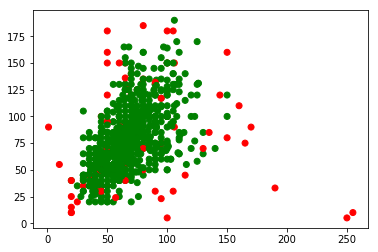

In [129]:
from sklearn.neighbors import LocalOutlierFactor as lof

ground_truth = np.array([-1 if x==True else 1 for x in y])
print(np.mean(ground_truth == -1))

model = lof(contamination = np.mean(ground_truth == -1),
           metric = "chebyshev")
preds = model.fit_predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)


display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

## Novelty detection

In [125]:
X = pd.DataFrame([1.0]*30)

detector = lof(novelty=True)

detector.fit(X)

test = pd.DataFrame([1 if x > 0.2 else 10 for x in np.random.rand(10)])
preds = detector.predict(test)

pd.concat([test, pd.DataFrame(preds)],1)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


0  0
0   1  1
1   1  1
2   1  1
3   1  1
4   1  1
5   1  1
6   1  1
7  10 -1
8   1  1
9   1  1

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


array([[ 19,  67],
       [ 46, 668]])

0.5782522311250081


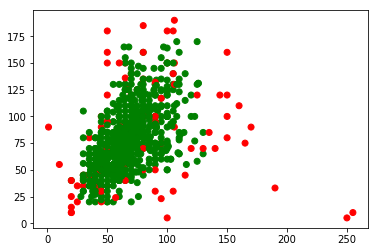

In [110]:
model = lof(novelty = True) # when there was no anomaly in the train data
model.fit(data[data[target] == False])
preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)


display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[ 65, 366],
       [  0, 369]])

0.5754060324825986


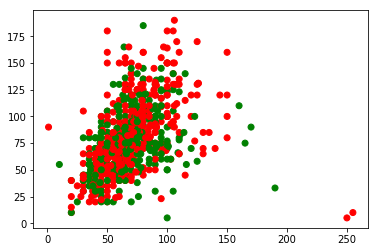

In [114]:
from sklearn.svm import OneClassSVM

model = OneClassSVM() # also works for novelty detection

model.fit(data[data[target] == False])

preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)
display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:214: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([[ 27,  74],
       [ 38, 661]])

0.6064816782107396


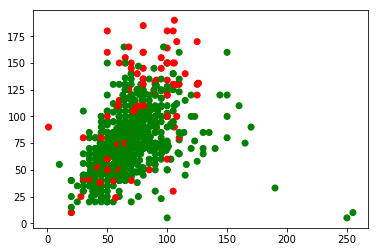

In [116]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(data[data[target] == False])

scores = model.score_samples(data)

preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)
display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

## sklearn-unsupervised

In [137]:
from sklearn.neighbors import DistanceMetric as dm

dist = dm.get_metric("euclidean")

A= [
    [0,1],
    [2,3],
    [0,6]
]
dist.pairwise(A)

array([[0.        , 2.82842712, 5.        ],
       [2.82842712, 0.        , 3.60555128],
       [5.        , 3.60555128, 0.        ]])

In [138]:
from scipy.spatial.distance import pdist

pdist(A, "cityblock")

array([4., 5., 5.])

In [142]:
from scipy.spatial.distance import squareform

squareform(pdist(X, "euclidean"))

array([[  0.        ,  35.56683849,  84.52810184, ..., 131.03053079,
        173.69225659, 124.45481108],
       [ 35.56683849,   0.        ,  48.98979486, ..., 101.19288513,
        145.05171492,  93.16651759],
       [ 84.52810184,  48.98979486,   0.        , ...,  69.57010852,
        111.53474795,  57.27128425],
       ...,
       [131.03053079, 101.19288513,  69.57010852, ...,   0.        ,
         54.77225575,  74.8465096 ],
       [173.69225659, 145.05171492, 111.53474795, ...,  54.77225575,
          0.        ,  96.96391081],
       [124.45481108,  93.16651759,  57.27128425, ...,  74.8465096 ,
         96.96391081,   0.        ]])

# sklearn-supervised

## Preprocessing

Missing data 

Important to consider it carefully to not introduce bias

In [4]:
from sklearn.impute import SimpleImputer

numeric_df = df.select_dtypes(include="number")
categoric_df = df.select_dtypes(include=[object])

# imp = SimpleImputer(strategy="constant", fill_value=0)
imp = SimpleImputer(strategy="mean")# also median, most_frequent

imputed_numeric_df = imp.fit_transform(numeric_df)

imputed_numeric_df = pd.DataFrame(imputed_numeric_df, columns = numeric_df.columns)

final_DF = pd.concat([categoric_df, imputed_numeric_df], axis=1)

final_DF

Name    Type 1  Type 2  Total     HP  Attack  \
0                    Bulbasaur     Grass  Poison  318.0   45.0    49.0   
1                      Ivysaur     Grass  Poison  405.0   60.0    62.0   
2                     Venusaur     Grass  Poison  525.0   80.0    82.0   
3        VenusaurMega Venusaur     Grass  Poison  625.0   80.0   100.0   
4                   Charmander      Fire     NaN  309.0   39.0    52.0   
5                   Charmeleon      Fire     NaN  405.0   58.0    64.0   
6                    Charizard      Fire  Flying  534.0   78.0    84.0   
7    CharizardMega Charizard X      Fire  Dragon  634.0   78.0   130.0   
8    CharizardMega Charizard Y      Fire  Flying  634.0   78.0   104.0   
9                     Squirtle     Water     NaN  314.0   44.0    48.0   
10                   Wartortle     Water     NaN  405.0   59.0    63.0   
11                   Blastoise     Water     NaN  530.0   79.0    83.0   
12     BlastoiseMega Blastoise     Water     NaN  630.0   79.0   103.0   
13                    Caterpie       Bug     NaN  195.0   45.0    30.0   
14                     Metapod       Bug     NaN  205.0   50.0    20.0   
15                  Butterfree       Bug  Flying  395.0   60.0    45.0   
16                      Weedle       Bug  Poison  195.0   40.0    35.0   
17                      Kakuna       Bug  Poison  205.0   45.0    25.0   
18                    Beedrill       Bug  Poison  395.0   65.0    90.0   
19       BeedrillMega Beedrill       Bug  Poison  495.0   65.0   150.0   
20                      Pidgey    Normal  Flying  251.0   40.0    45.0   
21                   Pidgeotto    Normal  Flying  349.0   63.0    60.0   
22                     Pidgeot    Normal  Flying  479.0   83.0    80.0   
23         PidgeotMega Pidgeot    Normal  Flying  579.0   83.0    80.0   
24                     Rattata    Normal     NaN  253.0   30.0    56.0   
25                    Raticate    Normal     NaN  413.0   55.0    81.0   
26                     Spearow    Normal  Flying  262.0   40.0    60.0   
27                      Fearow    Normal  Flying  442.0   65.0    90.0   
28                       Ekans    Poison     NaN  288.0   35.0    60.0   
29                       Arbok    Poison     NaN  438.0   60.0    85.0   
..                         ...       ...     ...    ...    ...     ...   
770                    Sylveon     Fairy     NaN  525.0   95.0    65.0   
771                   Hawlucha  Fighting  Flying  500.0   78.0    92.0   
772                    Dedenne  Electric   Fairy  431.0   67.0    58.0   
773                    Carbink      Rock   Fairy  500.0   50.0    50.0   
774                      Goomy    Dragon     NaN  300.0   45.0    50.0   
775                    Sliggoo    Dragon     NaN  452.0   68.0    75.0   
776                     Goodra    Dragon     NaN  600.0   90.0   100.0   
777                     Klefki     Steel   Fairy  470.0   57.0    80.0   
778                   Phantump     Ghost   Grass  309.0   43.0    70.0   
779                  Trevenant     Ghost   Grass  474.0   85.0   110.0   
780      PumpkabooAverage Size     Ghost   Grass  335.0   49.0    66.0   
781        PumpkabooSmall Size     Ghost   Grass  335.0   44.0    66.0   
782        PumpkabooLarge Size     Ghost   Grass  335.0   54.0    66.0   
783        PumpkabooSuper Size     Ghost   Grass  335.0   59.0    66.0   
784      GourgeistAverage Size     Ghost   Grass  494.0   65.0    90.0   
785        GourgeistSmall Size     Ghost   Grass  494.0   55.0    85.0   
786        GourgeistLarge Size     Ghost   Grass  494.0   75.0    95.0   
787        GourgeistSuper Size     Ghost   Grass  494.0   85.0   100.0   
788                   Bergmite       Ice     NaN  304.0   55.0    69.0   
789                    Avalugg       Ice     NaN  514.0   95.0   117.0   
790                     Noibat    Flying  Dragon  245.0   40.0    30.0   
791                    Noivern    Flying  Dragon  535.0   85.0    70.0   
792                    Xerneas

In [ ]:
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

imp_iter = IterativeImputer(max_iter=5, 
                            sample_posterior=True, 
                            random_state=42
                           )

imputed_numeric_df = imp_iter.fit_transform(numeric_df)

imputed_numeric_df = pd.DataFrame(imputed_numeric_df, columns = numeric_df.columns)

imputed_numeric_df

### Splitting

In [3]:
%run "../Functions/ML_fct.py"

Using TensorFlow backend.


In [4]:
target = "Legendary"

X = df.drop(["Name", "Total", "Type 2", target], axis=1).copy()
y = df[target].copy()

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Pipelines

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ("feature_selection", SelectKBest(f_classif)),
    ("classifier", RandomForestClassifier())
])

params = dict(
    feature_selection__k = [2,4,6],
    classifier__max_depth = [5,10,20],
    classifier__n_estimators = [10,50,100]
)

grid_search = GridSearchCV(pipe, 
                           param_grid=params, 
                           cv=3,
                          return_train_score = True)

gs = grid_search.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)

print("Best params= {}".format(gs.best_params_))
print("Best score= {}".format(gs.best_score_))

display(results)

print(results['mean_test_score']-results['mean_train_score'])

Best params= {'classifier__max_depth': 20, 'feature_selection__k': 6, 'classifier__n_estimators': 10}
Best score= 0.9410714285714286


mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.010580         0.001846         0.914286          0.958041   
1        0.010641         0.001812         0.930357          0.977687   
2        0.010632         0.001747         0.930357          0.982148   
3        0.037975         0.004524         0.926786          0.962505   
4        0.041218         0.004431         0.926786          0.981260   
5        0.038404         0.004029         0.930357          0.987506   
6        0.068474         0.007116         0.919643          0.963396   
7        0.073928         0.007210         0.932143          0.983936   
8        0.073142         0.007201         0.930357          0.988394   
9        0.009414         0.001554         0.908929          0.981257   
10       0.009838         0.001561         0.928571          0.993754   
11       0.010154         0.001537         0.937500          0.993752   
12       0.035765         0.004057         0.905357          0.989290   
13       0.038278         0.004086         0.928571          0.997321   
14       0.037539         0.003960         0.935714          0.997321   
15       0.071031         0.007595         0.903571          0.988399   
16       0.073763         0.007198         0.925000          0.997321   
17       0.075685         0.007456         0.937500          0.997321   
18       0.009912         0.001623         0.908929          0.979463   
19       0.010107         0.001589         0.935714          0.991974   
20       0.010217         0.001690         0.941071          0.994643   
21       0.038602         0.004459         0.908929          0.989290   
22       0.040393         0.004540         0.928571          0.997321   
23       0.042861         0.005008         0.937500          0.997321   
24       0.078602         0.007897         0.912500          0.989290   
25       0.082820         0.008031         0.928571          0.997321   
26       0.078720         0.007752         0.930357          0.997321   

   param_classifier__max_depth param_classifier__n_estimators  \
0                            5                             10   
1                            5                             10   
2                            5                             10   
3                            5                             50   
4                            5                             50   
5                            5                             50   
6                            5                            100   
7                            5                            100   
8                            5                            100   
9                           10                             10   
10                          10                             10   
11                          10                             10   
12                          10                             50   
13                          10                             50   
14                          10                             50   
15                          10                            100   
16                          10                            100   
17                          10                            100   
18                          20                             10   
19                          20                             10   
20                          20                             10   
21                          20                             50   
22                          20                             50   
23                          20                             50   
24                          20                            100   
25                          20                            100   
26                          20                            100   

   param_feature_selection__k  \
0                           2   
1                           4   
2                           6   
3     

0    -0.043756
1    -0.047330
2    -0.051791
3    -0.035719
4    -0.054474
5    -0.057148
6    -0.043753
7    -0.051793
8    -0.058037
9    -0.072329
10   -0.065183
11   -0.056252
12   -0.083933
13   -0.068750
14   -0.061607
15   -0.084828
16   -0.072321
17   -0.059821
18   -0.070534
19   -0.056260
20   -0.053571
21   -0.080362
22   -0.068750
23   -0.059821
24   -0.076790
25   -0.068750
26   -0.066964
dtype: float64


In [20]:
from sklearn.metrics import roc_auc_score, make_scorer

# Now let's use another metric
auc = make_scorer(roc_auc_score)

grid_search = GridSearchCV(pipe, 
                           param_grid=params,
                           cv = 5,
                          scoring = auc)
gs = grid_search.fit(X_train, y_train)

print("Best params= {}".format(gs.best_params_))
print("Best score= {}".format(gs.best_score_))

Best params= {'classifier__max_depth': 10, 'classifier__n_estimators': 10, 'feature_selection__k': 4}
Best score= 0.748235294117647


In [22]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(gs, file)

In [23]:
with open("model.pkl", "rb") as file:
    model = pickle.load(file)
    
model.predict(X_test)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [31]:
from sklearn.preprocessing import FunctionTransformer

# Define a feature extractor to flag very large values
def more_than_average(X, multiplier=1.0):
  Z = X.copy()
  Z[:,1] = Z[:,1] > multiplier*np.mean(Z[:,1])
  return Z

# Convert your function so that it can be used in a pipeline
pipe = Pipeline([
  ('ft', FunctionTransformer(more_than_average)),
  ('clf', RandomForestClassifier(random_state=2))])

# Optimize the parameter multiplier using GridSearchCV
params =  dict(
    ft__multiplier = [1.0,2.0,3.0]
    )
grid_search = GridSearchCV(pipe, param_grid=params)
gs = grid_search.fit(X_train, y_train)


print("Best params= {}".format(gs.best_params_))
print("Best score= {}".format(gs.best_score_))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Invalid parameter multiplier for estimator FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function more_than_average at 0x7f278f02a510>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=None). Check the list of available parameters with `estimator.get_params().keys()`.

### Sliding windows

In [45]:

# Loop over window sizes
wrange = range(10,200,20)
t_now = df.shape[0]

df2 = pd.concat([X,y],1)
accuracies = []

for w_size in wrange:
    # Define sliding window
    sliding = df2.loc[(t_now - w_size+1):t_now]
    # Extract X and y from the sliding window
    X_sliding, y_sliding = sliding.drop(target, 1), sliding[target]
    
    # Fit the classifier and store the F1 score
    preds = GaussianNB().fit(X_sliding, y_sliding).predict(X_test)
    accuracies.append(roc_auc_score(y_test, preds))

# Estimate the best performing window size
wrange[np.argmax(accuracies)]

print(accuracies)

[0.5, 0.66, 0.5533333333333333, 0.6955555555555555, 0.6955555555555555, 0.6333333333333334, 0.6333333333333334, 0.6333333333333334, 0.6333333333333334, 0.6333333333333334]


### Normalize and oneHotEncoding

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
sc = StandardScaler()

mms.fit(df[["Total"]])
mms.transform(df[["Total"]])

sc.fit_transform(df[["Total"]])

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-9.76765494e-01],
       [-2.51088433e-01],
       [ 7.49845443e-01],
       [ 1.58395701e+00],
       [-1.05183553e+00],
       [-2.51088433e-01],
       [ 8.24915484e-01],
       [ 1.65902705e+00],
       [ 1.65902705e+00],
       [-1.01012996e+00],
       [-2.51088433e-01],
       [ 7.91551021e-01],
       [ 1.62566258e+00],
       [-2.00272272e+00],
       [-1.91931156e+00],
       [-3.34499590e-01],
       [-2.00272272e+00],
       [-1.91931156e+00],
       [-3.34499590e-01],
       [ 4.99611974e-01],
       [-1.53562024e+00],
       [-7.18190909e-01],
       [ 3.66154124e-01],
       [ 1.20026569e+00],
       [-1.51893801e+00],
       [-1.84359508e-01],
       [-1.44386797e+00],
       [ 5.75328451e-02],
       [-1.22699896e+00],
       [ 2.41683826e-02],
       [-9.60083262e-01],
       [ 4.16200817e-01],
       [-1.12690558e+00],
       [ 1.24261770e-01],
       [-1.33543347e+00],
       [-5.84733059e-01],
       [ 5.83023130e-01],
       [-1.35211570e+00],
       [-5.8

In [8]:
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()

log.fit_transform(df[["HP"]])

array([[-1.00334746],
       [-0.27961937],
       [ 0.52702545],
       [ 0.52702545],
       [-1.33494891],
       [-0.36905506],
       [ 0.45248921],
       [ 0.45248921],
       [ 0.45248921],
       [-1.05662742],
       [-0.32410117],
       [ 0.48990486],
       [ 0.48990486],
       [-1.00334746],
       [-0.74739456],
       [-0.27961937],
       [-1.27759172],
       [-1.00334746],
       [-0.0638694 ],
       [-0.0638694 ],
       [-1.27759172],
       [-0.14888332],
       [ 0.6366751 ],
       [ 0.6366751 ],
       [-1.89764826],
       [-0.50688369],
       [-1.27759172],
       [-0.0638694 ],
       [-1.573934  ],
       [-0.27961937],
       [-1.573934  ],
       [-0.27961937],
       [-0.74739456],
       [ 0.3384095 ],
       [-0.50688369],
       [ 0.14176007],
       [ 0.88321863],
       [-0.95079617],
       [-0.23559707],
       [ 0.56385689],
       [ 0.14176007],
       [ 1.05205091],
       [-1.39322169],
       [ 0.26076297],
       [ 1.6766695 ],
       [ 2

In [8]:
a = pd.Series(["a", "a", "b"], name="class")
b = pd.Series(["ok", "nok", "ok"], name="type")
c = pd.Series([0,8,4], name="num")

abc = pd.concat([a,b,c], axis=1)
abc

class type  num
0     a   ok    0
1     a  nok    8
2     b   ok    4

In [12]:
sc = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [236]:
numeric_scaled = sc.fit_transform(abc.select_dtypes(include="number"))
numeric_scaled

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.22474487],
       [ 1.22474487],
       [ 0.        ]])

In [79]:
cat_encoded = ohe.fit_transform(abc.select_dtypes(include="object"))
pd.DataFrame(cat_encoded)

0    1    2    3
0  1.0  0.0  0.0  1.0
1  1.0  0.0  1.0  0.0
2  0.0  1.0  0.0  1.0

In [80]:
a1 = pd.Series(["c"], name="class")
b1 = pd.Series(["ok"], name="type")
c1 = pd.Series([8], name="num")

new = pd.concat([a1,b1,c1], axis=1)

pd.DataFrame(ohe.transform(new.select_dtypes(include="object")))

0    1    2    3
0  0.0  0.0  0.0  1.0

In [77]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False, handle_unknown="ignore")

X_train_2 = ohe.fit_transform(X_train.select_dtypes(include="object"))


X_test = X_test.sample(10, random_state=42).copy()
X_test.iloc[0,0] = "new" # to create a new category of test set on purpose
X_test_2 = pd.DataFrame(ohe.transform(X_test.select_dtypes(include="object").values.reshape(-1,1)), columns=ohe.get_feature_names())
X_test_2

x0_Bug  x0_Dark  x0_Dragon  x0_Electric  x0_Fairy  x0_Fighting  x0_Fire  \
0     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
1     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
2     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
3     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
4     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
5     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
6     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
7     0.0      1.0        0.0          0.0       0.0          0.0      0.0   
8     0.0      0.0        0.0          0.0       0.0          0.0      0.0   
9     0.0      0.0        0.0          0.0       0.0          0.0      0.0   

   x0_Flying  x0_Ghost  x0_Grass  x0_Ground  x0_Ice  x0_Normal  x0_Poison  \
0        0.0       0.0       0.0        0.0     0.0        0.0        0.0   
1        0.0       0.0       0.0        0.0     0.0        0.0        1.0   
2        0.0       0.0       0.0        0.0     1.0        0.0        0.0   
3        0.0       0.0       0.0        0.0     0.0        0.0        0.0   
4        0.0       0.0       0.0        0.0     0.0        1.0        0.0   
5        0.0       0.0       0.0        1.0     0.0        0.0        0.0   
6        0.0       1.0       0.0        0.0     0.0        0.0        0.0   
7        0.0       0.0       0.0        0.0     0.0        0.0        0.0   
8        0.0       0.0       0.0        0.0     0.0        0.0        0.0   
9        0.0       0.0       0.0        0.0     0.0        1.0        0.0   

   x0_Psychic  x0_Rock  x0_Steel  x0_Water  
0         0.0      0.0       0.0       0.0  
1         0.0      0.0       0.0       0.0  
2         0.0      0.0       0.0       0.0  
3         0.0      0.0       0.0       0.0  
4         0.0      0.0       0.0       0.0  
5         0.0      0.0       0.0       0.0  
6         0.0      0.0       0.0       0.0  
7         0.0      0.0       0.0       0.0  
8         0.0      0.0       0.0       0.0  
9         0.0      0.0       0.0       0.0

So when there is a new category that was not seen in the training example, it runs fine by putting 0 for all the columns related to that category column

In [ ]:

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

## GLR

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.coef_

array([ 0.26544178, -0.07234721,  0.16816318,  0.29295899, -0.12078157,
        1.16271042,  6.36192698, -2.98957141, -1.31463376, -2.48457368,
       -6.91816434,  2.82541388,  0.64974771, -4.47320833, -0.92880778,
       -8.44212327, -1.61984702,  4.20547338,  1.97139691, 16.79940931,
        6.17172557, -1.07687977, -1.62514394, -4.08718991,  3.33697647])

In [8]:
lr.score(X_test, y_test)

0.23483376524929958

In [28]:
# Import `statsmodels.api` module
import statsmodels.api as sm

# Initialize model instance on the training data
olsreg = sm.OLS(y_train, X_train)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1154.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          1.48e-323
Time:                        17:32:32   Log-Likelihood:                -2757.9
No. Observations:                 600   AIC:                             5528.
Df Residuals:                     594   BIC:                             5554.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HP             0.3795      0.040      9.425      0.0

## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
features = list(X_train.columns)

zipped = list(zip(features, lr.coef_[0]))
coefs = [list(x) for x in zipped]

coefs_df = pd.DataFrame(coefs, columns = ["Variables", "Coefficients"])

coefs_df.sort_values(by = ["Coefficients"], axis = 0, inplace=True, ascending=False)
coefs_df

Variables  Coefficients
14    Type 1_Flying      0.678088
9     Type 1_Dragon      0.466541
21   Type 1_Psychic      0.374317
23     Type 1_Steel      0.373309
17    Type 1_Ground      0.239679
3           Sp. Atk      0.017657
4           Sp. Def      0.015825
5             Speed      0.009698
1            Attack      0.006544
0                HP      0.006503
2           Defense      0.000498
6        Generation     -0.050971
8       Type 1_Dark     -0.205557
18       Type 1_Ice     -0.311878
10  Type 1_Electric     -0.334148
11     Type 1_Fairy     -0.352660
22      Type 1_Rock     -0.408243
13      Type 1_Fire     -0.492263
15     Type 1_Ghost     -0.605770
16     Type 1_Grass     -0.614416
20    Type 1_Poison     -0.638408
12  Type 1_Fighting     -0.895831
19    Type 1_Normal     -0.946795
7        Type 1_Bug     -1.268205
24     Type 1_Water     -1.324069

## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

results = pd.DataFrame({"actual":y_test,
                       "predictions":preds})

results.head()

actual  predictions
696   False         True
667   False         True
63    False         True
533   False         True
66    False        False

In [9]:
conf_mat = confusion_matrix(y_test, preds)
conf_mat

array([[100, 125],
       [  0,  15]])

In [11]:
TN, FP, FN, TP = conf_mat.ravel()

(FP, FN)

(125, 0)

In [19]:
cost = 10*FP + FN
cost

1250

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [20]:
accuracy = (TP + TN) / len(y_test)
print(accuracy)
print(accuracy_score(y_test, preds))

0.4791666666666667


In [25]:
recall = TP / (TP + FN)
print(recall)
print(recall_score(y_test, preds))

1.0
1.0


In [26]:
precision = TP / (TP + FP)
print(precision)
print(precision_score(y_test, preds))

0.10714285714285714
0.10714285714285714


In [28]:
f1 = 2*precision * recall / (precision+recall)
print(f1)
print(f1_score(y_test, preds))

0.19354838709677416
0.19354838709677416


## SVM

In [39]:
from sklearn.svm import SVR

svr = SVR()

grid_param = {  
    'kernel': ['rbf', 'sigmoid', 'linear'],
    'C': [1.0, 5.0],
    'gamma': ['auto_deprecated', 'scale'],
    'epsilon': [0.0, 0.5],
    'shrinking': [True, False]
}

launch_grid_search_CV(svr, X_train, y_train, grid_param, scoring = "explained_variance", cv = 3, n_jobs = -1)


KeyboardInterrupt: 

In [37]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=42)

grid_param = {  
    'epsilon': [0.0, 0.1, 0.5],
    'C': [1.0, 2.0, 3.0],
    'fit_intercept': [True, False]
}

launch_grid_search_CV(lsvr, X_train, y_train, grid_param, scoring = "explained_variance", cv = 3, n_jobs = -1)

The best parameters are : {'epsilon': 0.5, 'fit_intercept': False, 'C': 2.0}
The score for the best parameters is 0.301
Results 
 --------------- 
     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.067908         0.004485         0.235761          0.297248       1   
1        0.029617         0.002156         0.253480          0.298231       1   
2        0.051666         0.006049         0.285010          0.327515       1   
3        0.033653         0.047268         0.238662          0.290144       1   
4        0.163130         0.002606         0.216404          0.272334       1   
5        0.259296         0.010426         0.190408          0.253226       1   
6        0.109767         0.006705         0.292541          0.323801       2   
7        0.142619         0.008237         0.255481          0.327630       2   
8        0.121920         0.004812         0.271901          0.311429       2   
9        0.142221         0.014720        

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/depr

## Ensemble models

### Bagging

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)


bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)

acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.960, OOB accuracy: 0.935


### RFC

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


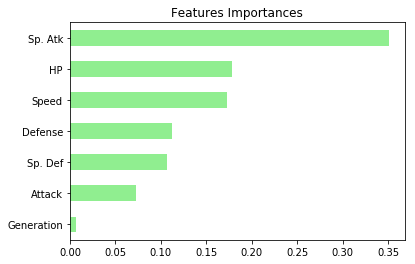

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2)
rfc.fit(X_train, y_train)

importances = pd.Series(data=rfc.feature_importances_,
                        index= X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [36]:
chosen_tree = rfc.estimators_[3]
for i in range(0,len(chosen_tree.tree_.feature)):


    split_col = chosen_tree.tree_.feature[i]
    split_col_name = X_train.columns[split_col]

    split_value = chosen_tree.tree_.threshold[i]

    print("The node {} splits on {} with threshold {}".format(i, split_col_name, split_value))

The node 0 splits on Sp. Atk with threshold 130.5
The node 1 splits on Sp. Def with threshold 89.5
The node 2 splits on Type 1_Steel with threshold -2.0
The node 3 splits on Type 1_Steel with threshold -2.0
The node 4 splits on Sp. Def with threshold 117.5
The node 5 splits on Type 1_Steel with threshold -2.0
The node 6 splits on Type 1_Steel with threshold -2.0


Best results were obtained with 115 trees -> 96.7%


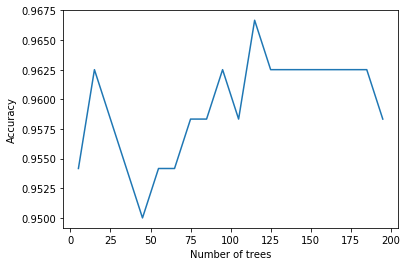

In [33]:
accuracies = []
trees = list(range(5,200,10))
max_acc = 0

for n in trees:

    rfc = RandomForestClassifier(n_estimators=n, random_state = 42)
    preds = rfc.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, preds)
#     print("Accuracy with {} trees = {:.1%}".format(n, accuracy))

    accuracies.append(accuracy)

    if accuracy > max_acc:
        max_acc = accuracy
        max_ind = n
    
# results_df = pd.DataFrame({
#     "trees":trees,
#     "accuracy":accuracies
# })
    
plt.plot(trees, accuracies)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
print("Best results were obtained with {} trees -> {:.1%}".format(max_ind, max_acc))
# display(results_df)

In [46]:
grid_param = {  
#     'n_estimators': [100, 300, 500],
    'max_depth': [2,5,10],
    'min_samples_leaf': [1, 2, 5, 10]
}

rfc = RandomForestClassifier(random_state = 42, max_features = "auto")

grid = GridSearchCV(
    estimator = rfc,
    param_grid = grid_param,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 5,
    refit = True,
    return_train_score = True)

grid.fit(X_train, y_train)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [48]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.119261         0.002552         0.914286          0.920536   
1        0.113395         0.002449         0.912500          0.919643   
2        0.113121         0.002311         0.910714          0.920089   
3        0.112038         0.002055         0.910714          0.916071   
4        0.112154         0.002094         0.928571          0.977232   
5        0.112759         0.002455         0.932143          0.970536   
6        0.112689         0.002218         0.926786          0.951339   
7        0.112687         0.002244         0.925000          0.937946   
8        0.111884         0.002326         0.926786          0.995089   
9        0.113813         0.002222         0.930357          0.979018   
10       0.113006         0.002242         0.932143          0.961161   
11       0.113073         0.002024         0.928571          0.936607   

   param_max_depth param_min_samples_leaf  \
0                2                      1   
1                2                      2   
2                2                      5   
3                2                     10   
4                5                      1   
5                5                      2   
6                5                      5   
7                5                     10   
8               10                      1   
9               10                      2   
10              10                      5   
11              10                     10   

                                       params  rank_test_score  \
0     {'max_depth': 2, 'min_samples_leaf': 1}                9   
1     {'max_depth': 2, 'min_samples_leaf': 2}               10   
2     {'max_depth': 2, 'min_samples_leaf': 5}               11   
3    {'max_depth': 2, 'min_samples_leaf': 10}               11   
4     {'max_depth': 5, 'min_samples_leaf': 1}                4   
5     {'max_depth': 5, 'min_samples_leaf': 2}                1   
6     {'max_depth': 5, 'min_samples_leaf': 5}                6   
7    {'max_depth': 5, 'min_samples_leaf': 10}                8   
8    {'max_depth': 10, 'min_samples_leaf': 1}                6   
9    {'max_depth': 10, 'min_samples_leaf': 2}                3   
10   {'max_depth': 10, 'min_samples_leaf': 5}                1   
11  {'max_depth': 10, 'min_samples_leaf': 10}                4   

    split0_test_score  split0_train_score       ...         split2_test_score  \
0            0.919643            0.915179       ...                  0.910714   
1            0.919643            0.915179       ...                  0.910714   
2            0.910714            0.912946       ...                  0.910714   
3            0.910714            0.910714       ...                  0.910714   
4            0.946429            0.982143       ...                  0.937500   
5            0.946429            0.979911       ...                  0.928571   
6            0.928571            0.946429       ...                  0.937500   
7            0.928571            0.935268       ...                  0.919643   
8            0.928571            0.995536       ...                  0.937500   
9            0.946429            0.973214       ...                  0.937500   
10           0.946429            0.959821       ...                  0.937500   
11           0.928571            0.935268       ...                  0.919643   

    split2_train_score  split3_test_score  split3_train_score  \
0             0.912946           0.910714            0.912946   
1             0.912946           0.910714            0.912946   
2             0.915179           0.910714            0.910714   
3             0.910714           0.910714            0.910714   
4             0.979911           0.919643            0.977679   
5             0.966518           0.964286            0.962054   
6             0.953125           0.919643            0.957589   
7             0.937500           0.

In [50]:
print(grid.best_params_)
print(grid.best_estimator_)

{'max_depth': 5, 'min_samples_leaf': 2}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [38]:
from sklearn.ensemble import RandomForestRegressor

grid_param = {  
    'n_estimators': [100, 300, 500],
    'criterion': ['mse', 'mae'],
    'bootstrap': [True, False]
}

rfr = RandomForestRegressor(random_state = 42)

launch_grid_search_CV(rfr, X_train, y_train, grid_param, scoring = "explained_variance", cv = 3, n_jobs = -1)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The best parameters are : {'bootstrap': True, 'criterion': 'mse', 'n_estimators': 500}
The score for the best parameters is 0.396
Results 
 --------------- 
     mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.325790         0.012802         0.388543          0.905066   
1        0.952862         0.096714         0.392605          0.908045   
2        1.526625         0.098416         0.396041          0.910366   
3        1.631661         0.018736         0.388572          0.904629   
4        5.049075         0.029856         0.390385          0.907175   
5       10.432604         0.035363         0.390062          0.909576   
6        0.521198         0.051320         0.026084          1.000000   
7        1.184101         0.047588         0.028846          1.000000   
8        1.931483         0.076290         0.026239          1.000000   
9        2.488455         0.021858        -0.533828          1.000000   
10       8.836036         0.024721     

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings

0.2110515938422636

### GBM

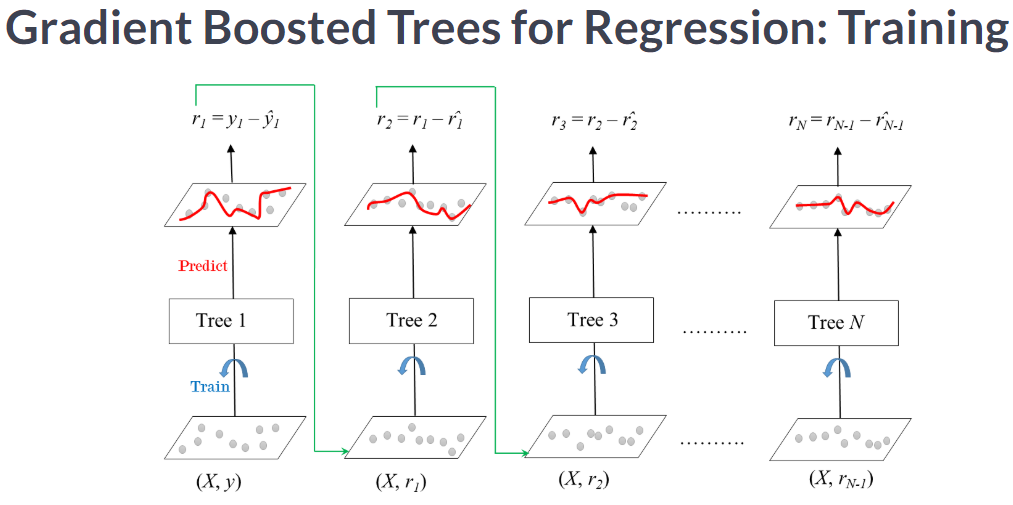

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbm = GradientBoostingClassifier()
print("Cross val score with {} folds = {:.2f}".format(5, np.mean(cross_val_score(gbm, X_train, y_train, cv=5))))

Cross val score with 5 folds = 0.93


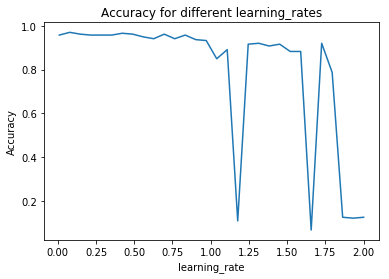

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:

    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

In [37]:
from sklearn import metrics

sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [ ]:
params_grid = {
    "learning_rate": [0.1,0.2,0.5,1],
    "n_estimators": [5,20,50,100,500]
}

### AdaBoost

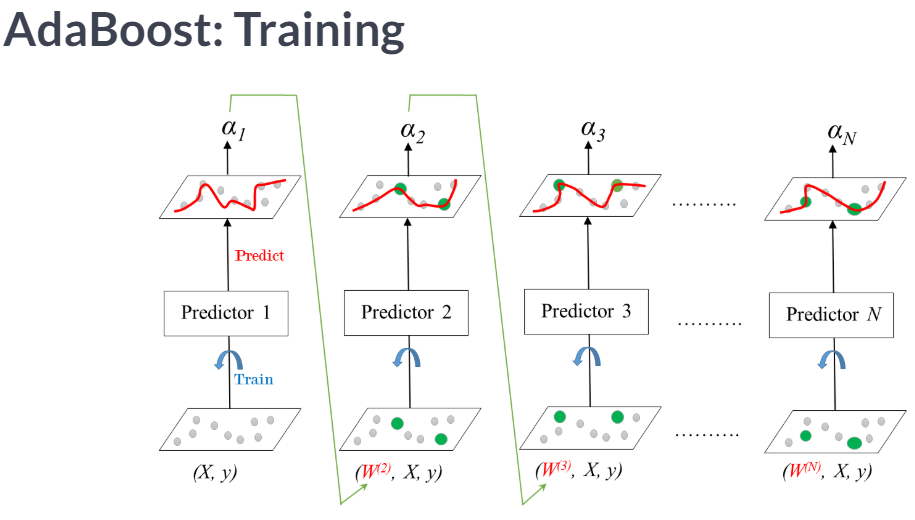

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

ada.fit(X_train, y_train)
y_pred_proba = ada.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score

ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.98


In [10]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
print("Cross val score with {} folds = {:.2f}".format(5, np.mean(cross_val_score(ada, X_train, y_train, cv=5))))

Cross val score with 5 folds = 0.94


### Stochastic gradient boosting

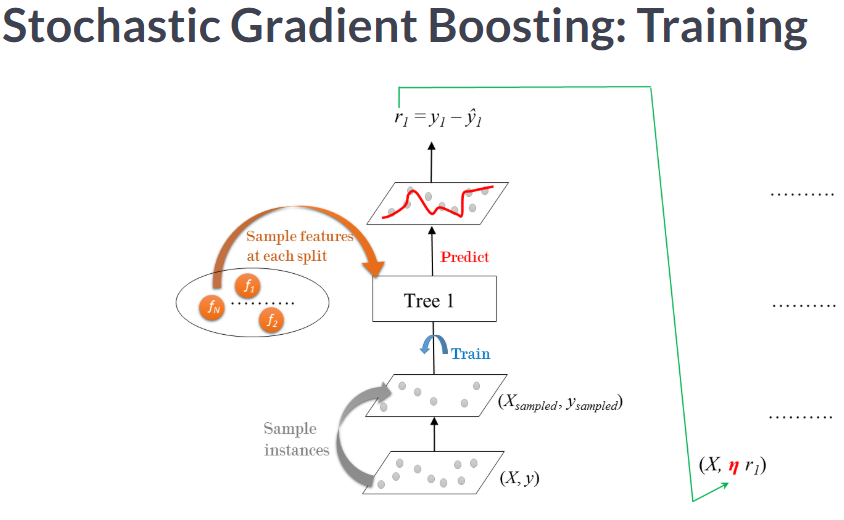

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

sgbr = GradientBoostingClassifier(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)


sgbr.fit(X_train,y_train)

y_pred = sgbr.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Test set accuracy of sgbr: {:.3f}'.format(acc))

Test set accuracy of sgbr: 0.950


## KNN

In [42]:
knn = KNeighborsRegressor(metric='minkowski', 
                          n_jobs=-1)

grid_param = {  
    'n_neighbors': [2, 3, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [15, 30, 50],
    'p':[1,2,3]
}

launch_grid_search_CV(knn, X_train, y_train, grid_param, scoring = "explained_variance", cv = 3, n_jobs = -1);

The best parameters are : {'p': 1, 'n_neighbors': 5, 'leaf_size': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}
The score for the best parameters is 0.371
Results 
 --------------- 
      mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.006379         0.127370         0.266822          0.740603   
1         0.005937         0.124953         0.264887          1.000000   
2         0.006773         0.124830         0.251121          0.728417   
3         0.005889         0.134684         0.248284          1.000000   
4         0.010912         0.116238         0.292704          0.733905   
5         0.010711         0.147726         0.283641          1.000000   
6         0.005159         0.150157         0.357156          0.656077   
7         0.005031         0.121629         0.360525          1.000000   
8         0.004384         0.130314         0.356654          0.655038   
9         0.004381         0.130745         0.352999          1.000000

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_a

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.006379         0.127370         0.266822          0.740603   
1         0.005937         0.124953         0.264887          1.000000   
2         0.006773         0.124830         0.251121          0.728417   
3         0.005889         0.134684         0.248284          1.000000   
4         0.010912         0.116238         0.292704          0.733905   
5         0.010711         0.147726         0.283641          1.000000   
6         0.005159         0.150157         0.357156          0.656077   
7         0.005031         0.121629         0.360525          1.000000   
8         0.004384         0.130314         0.356654          0.655038   
9         0.004381         0.130745         0.352999          1.000000   
10        0.009591         0.124503         0.302888          0.633452   
11        0.008273         0.117201         0.303671          1.000000   
12        0.004178         0.118125         0.349977          0.529651   
13        0.004150         0.129151         0.368141          1.000000   
14        0.007206         0.122917         0.349152          0.524146   
15        0.003984         0.115723         0.358633          1.000000   
16        0.008972         0.119161         0.339489          0.531448   
17        0.008692         0.131073         0.347249          1.000000   
18        0.003841         0.138342         0.261905          0.740639   
19        0.003923         0.138436         0.260437          1.000000   
20        0.004016         0.119451         0.251121          0.728417   
21        0.003935         0.116994         0.248284          1.000000   
22        0.007228         0.120581         0.292704          0.733905   
23        0.010603         0.131561         0.283641          1.000000   
24        0.003932         0.118668         0.359082          0.658472   
25        0.003925         0.118697         0.362195          1.000000   
26        0.003850         0.119683         0.356763          0.655202   
27        0.003639         0.109569         0.353099          1.000000   
28        0.007644         0.113543         0.302888          0.633460   
29        0.007176         0.125511         0.303671          1.000000   
..             ...              ...              ...               ...   
132       0.003496         0.116072         0.356328          0.651840   
133       0.003863         0.112784         0.360455          1.000000   
134       0.003174         0.111573         0.356654          0.655460   
135       0.002470         0.111256         0.352999          1.000000   
136       0.003385         0.111427         0.302888          0.633458   
137       0.002360         0.110708         0.303671          1.000000   
138       0.002358         0.126595         0.350289          0.532719   
139       0.002899         0.135927         0.367593          1.000000   
140       0.003426         0.123475         0.349165          0.523521   
141       0.002850         0.118469         0.358628          1.000000   
142       0.003155         0.115079         0.339550          0.531341   
143       0.003588         0.125061         0.347285          1.000000   
144       0.003732         0.125629         0.257001          0.736931   
145       0.004363         0.119201         0.255818          1.000000   
146       0.002954         0.112687         0.251121          0.728312   
147       0.003247         0.115592         0.248284          1.000000   
148       0.002675         0.118443         0.292704          0.733903   
149       0.003707         0.112841         0.283641          1.000000   
150       0.002841         0.115529         0.356328          0.651840   
151       0.003383         0.126658         0.360455          1.000000   
152       0.004319         0.121385         0.356654          0.655460   
153       0.003096         0.112715         0.352999          1.000000   
154      

Fitting the model 

Train R² = 1.000
Test R² = 0.271

Train adj R² = 1.000
Test adj R² = 0.186

Train RMSE = 0.000
Test RMSE = 20.893

Train MAE = 0.000
Test MAE = 14.273

Train MAPE = 0.00
Test MAPE = 47.86

Train MPE = 0.00
Test MPE = -33.62



/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


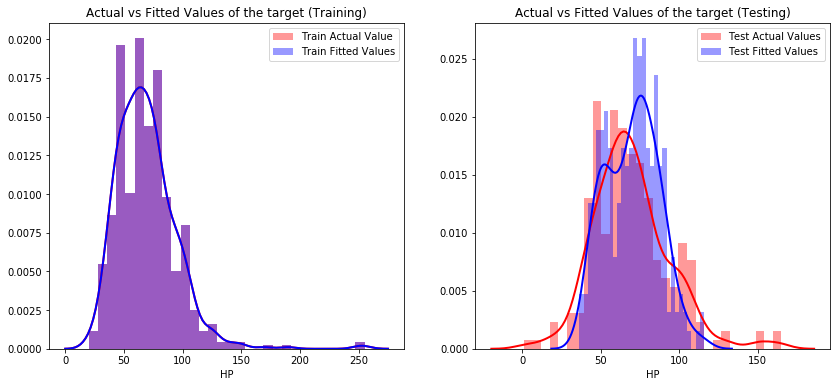

Maximal errors to reach 25% accuracy on the test set = 3.472
Maximal errors to reach 50% accuracy on the test set = 9.616
Maximal errors to reach 75% accuracy on the test set = 19.706
Maximal errors to reach 90% accuracy on the test set = 31.649
Maximal errors to reach 100% accuracy on the test set = 112.127


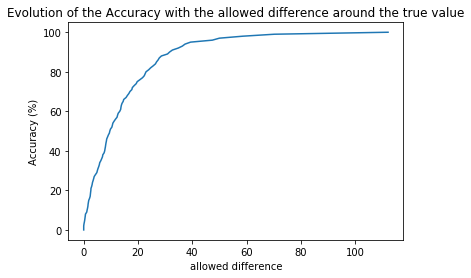

Area under the curve = 87.4%
Residuals descriptive statistics
-------------------------
count    240.000000
mean      -0.365597
std       20.933182
min      -61.610842
25%      -11.880813
50%       -1.587663
75%        7.728360
max      112.126984
Name: HP, dtype: float64


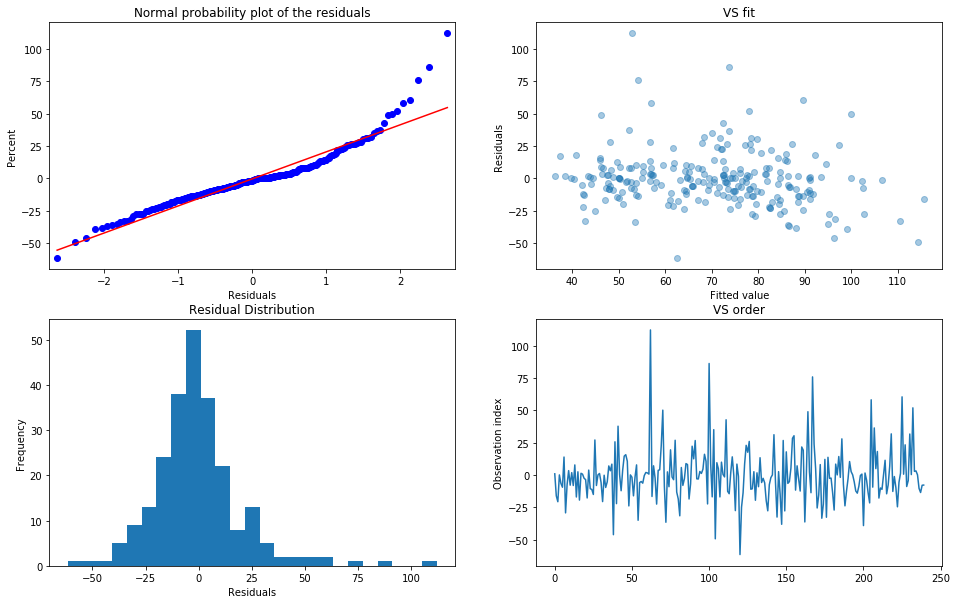

In [43]:
knn = KNeighborsRegressor(n_neighbors=5,
                          p=1,
                          leaf_size=50,
                          weights="distance",
                          algorithm="ball_tree",
                          metric='minkowski', 
                          n_jobs=-1)


diagnose_regression_model(knn, X_train, y_train, X_test, y_test)

In [ ]:
plt.hist2d(y = knn.kneighbors_graph(X_test).toarray())

## MLP 

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, ))

model = mlp.fit(X_train, y_train)

preds = model.predict(X_test)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, preds)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [20]:
model.score(X_test, y_test)

0.10416666666666667

## GridSearch

Randomized

Text(0.5,1,'Visualizing random gridsearch')

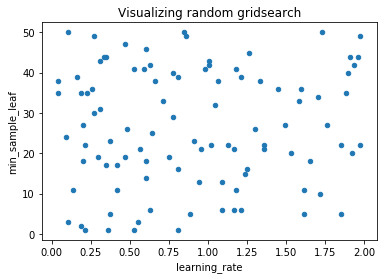

In [5]:
from itertools import product
from random import sample

learn_rates = np.linspace(0.001,2,150)
min_sample_leafs = list(range(1,51))

combination_list = [list(x) for x in product(learn_rates, min_sample_leafs)]
random_combination = sample(combination_list, 100)


pd.DataFrame(random_combination, columns=["learning_rate", "min_sample_leaf"]).plot.scatter(x="learning_rate", y = "min_sample_leaf")
plt.title("Visualizing random gridsearch")

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {"max_depth":list(range(5,26)), 
    "max_features":["auto", "sqrt"]
} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring="roc_auc", n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[22 22 10 5 10]
['sqrt' 'auto' 'sqrt' 'sqrt' 'auto']


Informed

In [37]:
np.arange(2,10,2)

array([2, 4, 6, 8])

In [39]:
# Set up space dictionary with specified hyperparameters
space = {'max_depth': np.arange(2, 10, 2),
         'learning_rate':np.linspace(0.001,0.9, 20),
         'n_estimators': np.arange(20,500,20)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params["max_depth"]),'learning_rate': params["learning_rate"]}
    gbm_clf = GradientBoostingClassifier(**params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.RandomState(42), algo=tpe.suggest)
print(best)

NameError: name 'fmin' is not defined

## Cost function

In [12]:
def compute_cost_function(preds, actuals, cost_fp=0, cost_fn=0, gain_tp=0, gain_tn=0):
    tn, fn, fp, tp = confusion_matrix(actuals, preds).ravel()
    
    cost = tp * gain_tp + tn * gain_tn - fp * cost_fp - fn * cost_fn
    
    return(cost)

## tpot

tpot is like an autoML library. You don't need to specify any algorithm or hyperparameter. 
It is based on the genetics theory of evolution and only requires a few parameters

In [50]:
from tpot import TPOTClassifier

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=20, 
                          population_size=5,
                          offspring_size=10, 
                          scoring="roc_auc",
                          verbosity=2,
                          random_state=42,
                          cv=5)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print("AUC on training set = {:.2f}".format(tpot_clf.score(X_train, y_train)))
print("AUC on testing set = {:.2f}".format(tpot_clf.score(X_test, y_test)))


Generation 1 - Current best internal CV score: 0.9688235294117649
Generation 2 - Current best internal CV score: 0.9739215686274509
Generation 3 - Current best internal CV score: 0.9745098039215687
Generation 4 - Current best internal CV score: 0.9745098039215687
Generation 5 - Current best internal CV score: 0.9745098039215687
Generation 6 - Current best internal CV score: 0.9745098039215687
Generation 7 - Current best internal CV score: 0.9745098039215687
Generation 8 - Current best internal CV score: 0.975392156862745
Generation 9 - Current best internal CV score: 0.975392156862745
Generation 10 - Current best internal CV score: 0.975392156862745
Generation 11 - Current best internal CV score: 0.978627450980392
Generation 12 - Current best internal CV score: 0.978627450980392
Generation 13 - Current best internal CV score: 0.978627450980392
Generation 14 - Current best internal CV score: 0.978627450980392
Generation 15 - Current best internal CV score: 0.978627450980392
Generation 1

In [51]:
preds = tpot_clf.predict(X_test)

confusion_matrix(preds, y_test)

array([[219,   1],
       [  6,  14]])

## Regex

In [44]:
import re

txt = "Hello How are you today ? It's 25 degrees, so I m having lunch outside"

print(re.findall("\w*", txt))
print(re.findall("y[ou]u", txt))
print(re.findall("\d+", txt))
print(re.findall("\D+", txt))
print(re.findall("[a-z]+", txt))
print(re.findall("\S+", txt))

['Hello', '', 'How', '', 'are', '', 'you', '', 'today', '', '', '', 'It', '', 's', '', '25', '', 'degrees', '', '', 'so', '', 'I', '', 'm', '', 'having', '', 'lunch', '', 'outside', '']
['you']
['25']
["Hello How are you today ? It's ", ' degrees, so I m having lunch outside']
['ello', 'ow', 'are', 'you', 'today', 't', 's', 'degrees', 'so', 'm', 'having', 'lunch', 'outside']
['Hello', 'How', 'are', 'you', 'today', '?', "It's", '25', 'degrees,', 'so', 'I', 'm', 'having', 'lunch', 'outside']


## H2O

In [61]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_232"; OpenJDK Runtime Environment (build 1.8.0_232-b09); OpenJDK 64-Bit Server VM (build 25.232-b09, mixed mode)
  Starting server from /work/jupyterhub/id860112/envs/My_Python_3.5/h2o_jar/h2o.jar
  Ice root: /tmp/tmpaj_taba7
  JVM stdout: /tmp/tmpaj_taba7/h2o_id860112_started_from_python.out
  JVM stderr: /tmp/tmpaj_taba7/h2o_id860112_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         03 secs
H2O cluster timezone:       Europe/Brussels
H2O data parsing timezone:  UTC
H2O cluster version:        3.18.0.2
H2O cluster version age:    1 year, 8 months and 12 days !!!
H2O cluster name:           H2O_from_python_id860112_f10wse
H2O cluster total nodes:    1
H2O cluster free memory:    26.67 Gb
H2O cluster total cores:    40
H2O cluster allowed cores:  40
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.5.5 final
--------------------------  ----------------------------------------

## Anomaly detection

In [52]:
data = pd.get_dummies(df.drop(["Name", "Total"], axis=1))


0.08125


array([[ 11,  54],
       [ 54, 681]])

0.5478806907378335


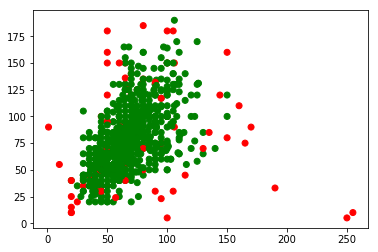

In [129]:
from sklearn.neighbors import LocalOutlierFactor as lof

ground_truth = np.array([-1 if x==True else 1 for x in y])
print(np.mean(ground_truth == -1))

model = lof(contamination = np.mean(ground_truth == -1),
           metric = "chebyshev")
preds = model.fit_predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)


display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

## Novelty detection

In [125]:
X = pd.DataFrame([1.0]*30)

detector = lof(novelty=True)

detector.fit(X)

test = pd.DataFrame([1 if x > 0.2 else 10 for x in np.random.rand(10)])
preds = detector.predict(test)

pd.concat([test, pd.DataFrame(preds)],1)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


0  0
0   1  1
1   1  1
2   1  1
3   1  1
4   1  1
5   1  1
6   1  1
7  10 -1
8   1  1
9   1  1

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


array([[ 19,  67],
       [ 46, 668]])

0.5782522311250081


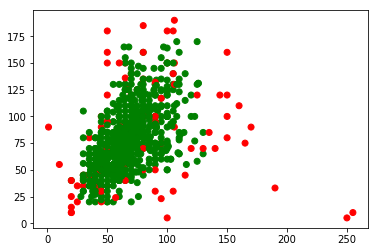

In [110]:
model = lof(novelty = True) # when there was no anomaly in the train data
model.fit(data[data[target] == False])
preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)


display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[ 65, 366],
       [  0, 369]])

0.5754060324825986


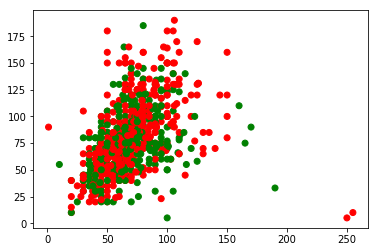

In [114]:
from sklearn.svm import OneClassSVM

model = OneClassSVM() # also works for novelty detection

model.fit(data[data[target] == False])

preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)
display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:214: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([[ 27,  74],
       [ 38, 661]])

0.6064816782107396


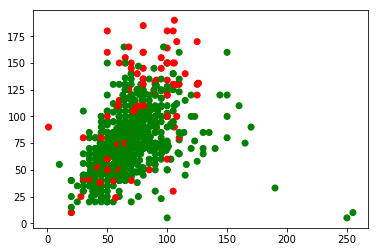

In [116]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(data[data[target] == False])

scores = model.score_samples(data)

preds = model.predict(data)

preds_color = ["green" if x > 0 else "red" for x in preds ]

plt.scatter(data["HP"], data["Attack"], color=preds_color)
display(confusion_matrix(preds, ground_truth))
print(roc_auc_score(preds, ground_truth))

## sklearn-unsupervised

In [137]:
from sklearn.neighbors import DistanceMetric as dm

dist = dm.get_metric("euclidean")

A= [
    [0,1],
    [2,3],
    [0,6]
]
dist.pairwise(A)

array([[0.        , 2.82842712, 5.        ],
       [2.82842712, 0.        , 3.60555128],
       [5.        , 3.60555128, 0.        ]])

In [138]:
from scipy.spatial.distance import pdist

pdist(A, "cityblock")

array([4., 5., 5.])

In [142]:
from scipy.spatial.distance import squareform

squareform(pdist(X, "euclidean"))

array([[  0.        ,  35.56683849,  84.52810184, ..., 131.03053079,
        173.69225659, 124.45481108],
       [ 35.56683849,   0.        ,  48.98979486, ..., 101.19288513,
        145.05171492,  93.16651759],
       [ 84.52810184,  48.98979486,   0.        , ...,  69.57010852,
        111.53474795,  57.27128425],
       ...,
       [131.03053079, 101.19288513,  69.57010852, ...,   0.        ,
         54.77225575,  74.8465096 ],
       [173.69225659, 145.05171492, 111.53474795, ...,  54.77225575,
          0.        ,  96.96391081],
       [124.45481108,  93.16651759,  57.27128425, ...,  74.8465096 ,
         96.96391081,   0.        ]])

# Classification metrics

In [8]:
def compute_all_metrics(TP, TN, FP, FN):
    """
    return all classification metrics from confusion matrix
    """
    
    actual_positive = TP + FN
    actual_negative = TN + FP
    
    predicted_positive = TP + FP
    predicted_negative = TN + FN
    
    total = TP + TN + FP + FN
    
    prevalence = actual_positive / total
    accuracy = (TP + TN) / total
    
    precision = TP / predicted_positive
    NPV = TN / predicted_negative
    FOR = FN / predicted_negative
    FDR = FP / predicted_positive
    
    recall = TP / actual_positive
    specificity = TN / actual_negative
    fallout = FN / actual_negative
    FNR = FP / actual_positive
    
    PLR = recall / fallout
    NLR = FNR / specificity
    
    f1 = 2*precision*recall / (precision + recall)
    
    
    print("prevalence = {:.1%}".format(prevalence))
    print("accuracy = {:.1%}".format(accuracy))
    
    print("\nTPR = recall = sensitivity = prob of detection = {:.1%}".format(recall))
    print("FNR = miss rate = {:.1%}".format(FNR))
    print("FPR = fallout = prob of false alarm = {:.1%}".format(fallout))
    print("TNR = selectivity = specificity = {:.1%}".format(specificity))
    
    print("\nPPV = precision = {:.1%}".format(precision))
    print("FDR = false discovery rate = {:.1%}".format(FDR))
    print("FOR = false omission rate = {:.1%}".format(FOR))
    print("NPV = {:.1%}".format(NPV))
    
    print("\nPLR = positive likelihood ratio = {:.1f}".format(PLR))
    print("NLR = negative likelihood ratio = {:.1f}".format(NLR))
    print("F1 = {:.1%}".format(f1))
    
    
compute_all_metrics(TP = 25, TN = 55, FP = 12, FN = 8)
    

prevalence = 33.0%
accuracy = 80.0%

TPR = recall = sensitivity = prob of detection = 75.8%
FNR = miss rate = 36.4%
FPR = fallout = prob of false alarm = 11.9%
TNR = selectivity = specificity = 82.1%

PPV = precision = 67.6%
FDR = false discovery rate = 32.4%
FOR = false omission rate = 12.7%
NPV = 87.3%

PLR = positive likelihood ratio = 6.3
NLR = negative likelihood ratio = 0.4
F1 = 71.4%


# Advanced techniques

In [5]:
df = pd.read_csv("Data/data.csv")
column_names = list(df.columns)

df.drop(["num", "Total"], axis=1, inplace=True)

X_num = df.iloc[:,3:10]
y_cat = df["Legendary"]

In [13]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [14]:
target = "Attack"
features = ['HP', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary']

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state = 42)

## Model blending

Goal here is to train several model and average their output

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model on Part 1
gb = GradientBoostingRegressor().fit(part_1[features], part_1[target])

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1[target])

test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])

# Find mean of model predictions
test['blend'] = (test["gb_pred"] + test["rf_pred"]) / 2
print(test[['gb_pred', 'rf_pred', 'blend']].head(3))

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

        gb_pred  rf_pred       blend
696  131.795354    122.9  127.347677
667   80.062231     92.5   86.281116
63    65.008635     59.5   62.254318


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Model stacking

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model on Part 1
gb = GradientBoostingRegressor().fit(part_1[features], part_1[target])

# Train a Random Forest model on Part 1
rf = RandomForestRegressor().fit(part_1[features], part_1[target])

# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
test['gb_pred'] = gb.predict(test[features])
test['rf_pred'] = rf.predict(test[features])


from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2[target])

# Make stacking predictions on the test data
test['stacking'] = lr.predict(test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

[0.45993974 0.48960342]


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
